### THAILAND CO2 EMISSIONS


In [149]:
## Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [150]:
## LOADING THE DATASET:

data = pd.read_csv('/content/EMISSION_DATA.csv')


In [151]:
## TO KNOW ABOUT THE DATA:

print(data.columns)

print("#----------------------------------------------------#")
print("YEARS: ",data['year'].unique())
print("MONTHS :",data['month'].unique())
print("SOURCE :" ,data['source'].unique())
print("FUEL_TYPE :",data['fuel_type'].unique())
print("EMISSION_TONS :",data['emissions_tons'].unique())


Index(['year', 'month', 'source', 'fuel_type', 'emissions_tons'], dtype='object')
#----------------------------------------------------#
YEARS:  [1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022]
MONTHS : [ 1  2  3  4  5  6  7  8  9 10 11 12]
SOURCE : ['transport' 'industry' 'other']
FUEL_TYPE : ['oil' 'coal' 'natural_gas']
EMISSION_TONS : [1588.61 1428.29 1581.16 ... 1612.04 1539.67 1553.15]


In [152]:
## TO CHECK THE DATASET HAS ANY NULL VALUES:

data.isnull().sum()

year              0
month             0
source            0
fuel_type         0
emissions_tons    0
dtype: int64

### EXPLORATORY DATA ANALYSIS


In [153]:
## WHICH SECTOR EMITTES MORE AMOUNT OF CARBON

transport_data = data.loc[data['source'] == 'transport']
industry_data = data.loc[data['source']=='industry']
other_data=data.loc[data['source']=='other']




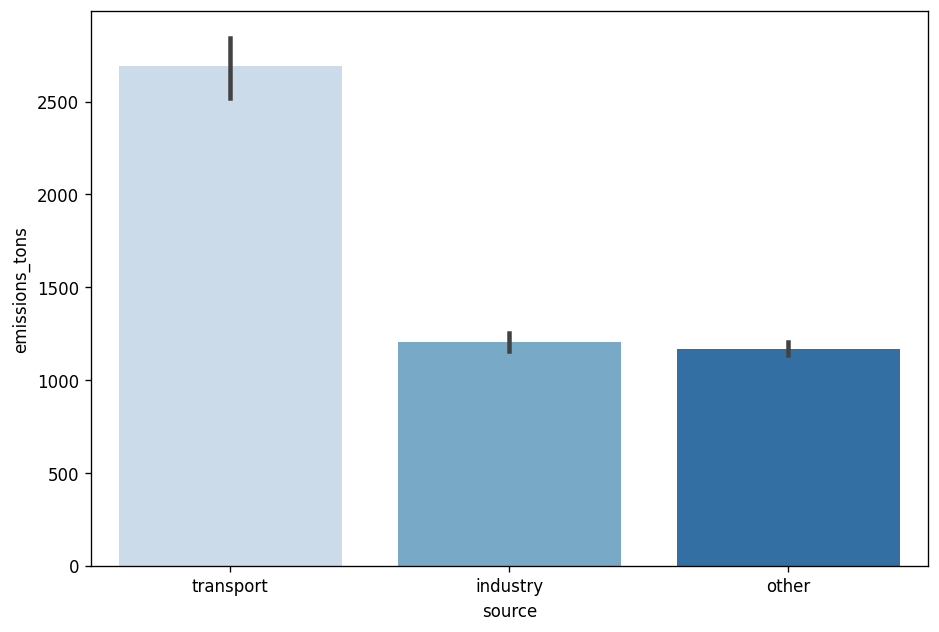

In [154]:
## AVERAGE AMOUNT OF CO_2 EMISSIONS FROM THE SOURCE_TYPE:

sns.barplot(x = 'source',
            y = 'emissions_tons',
            palette = 'Blues',
            data = data)

# Show the plot
plt.show()

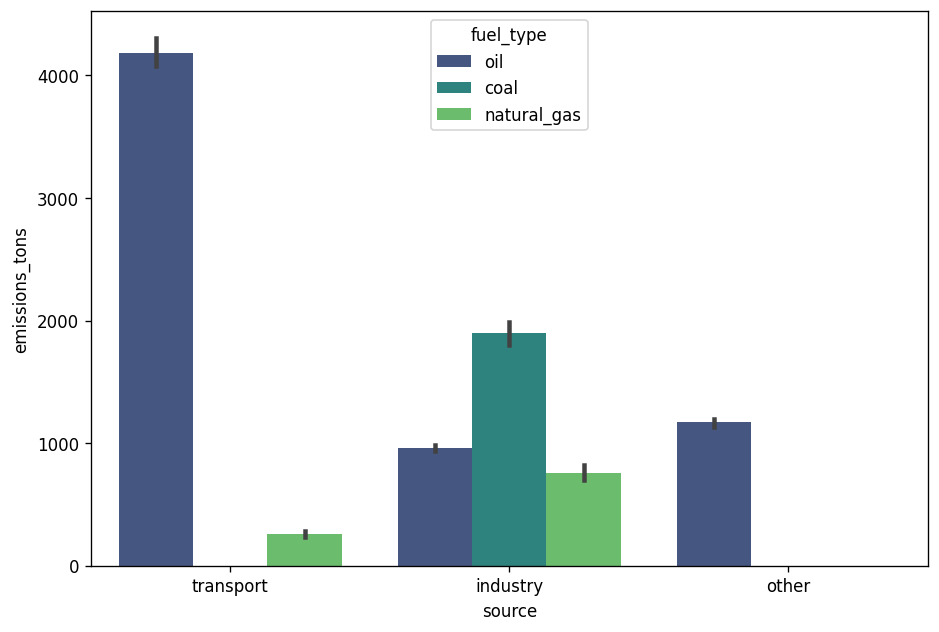

In [155]:
## AVERAGE AMOUNT OF CO_2 EMISSIONS FROM EACH FUEL TYPE

sns.barplot(x = 'source',
            y = 'emissions_tons',
            hue = 'fuel_type',
            palette = 'viridis',
            data = data)

# Show the plot
plt.show()

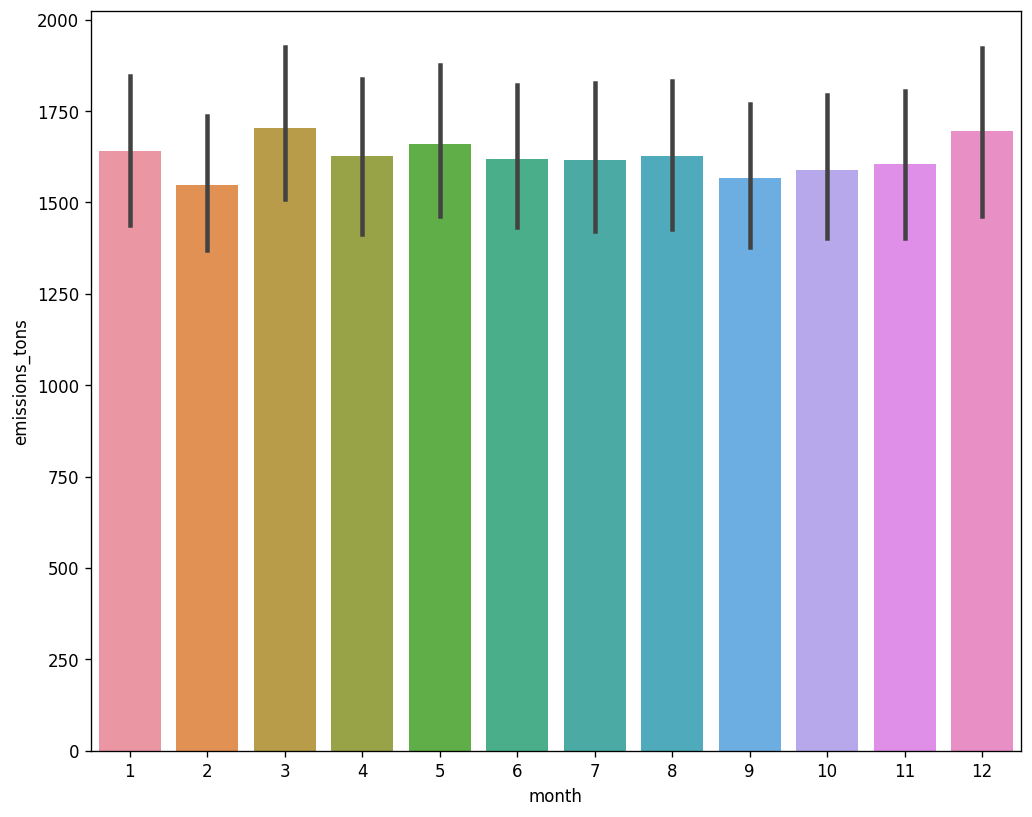

In [156]:
## WHICH MONTH HAS MORE AMOUNT OF CO2 EMISSIONS??


plt.figure(figsize=(10,8))

sns.barplot(x = 'month',
            y = 'emissions_tons',
            data = data)

# Show the plot
plt.show()


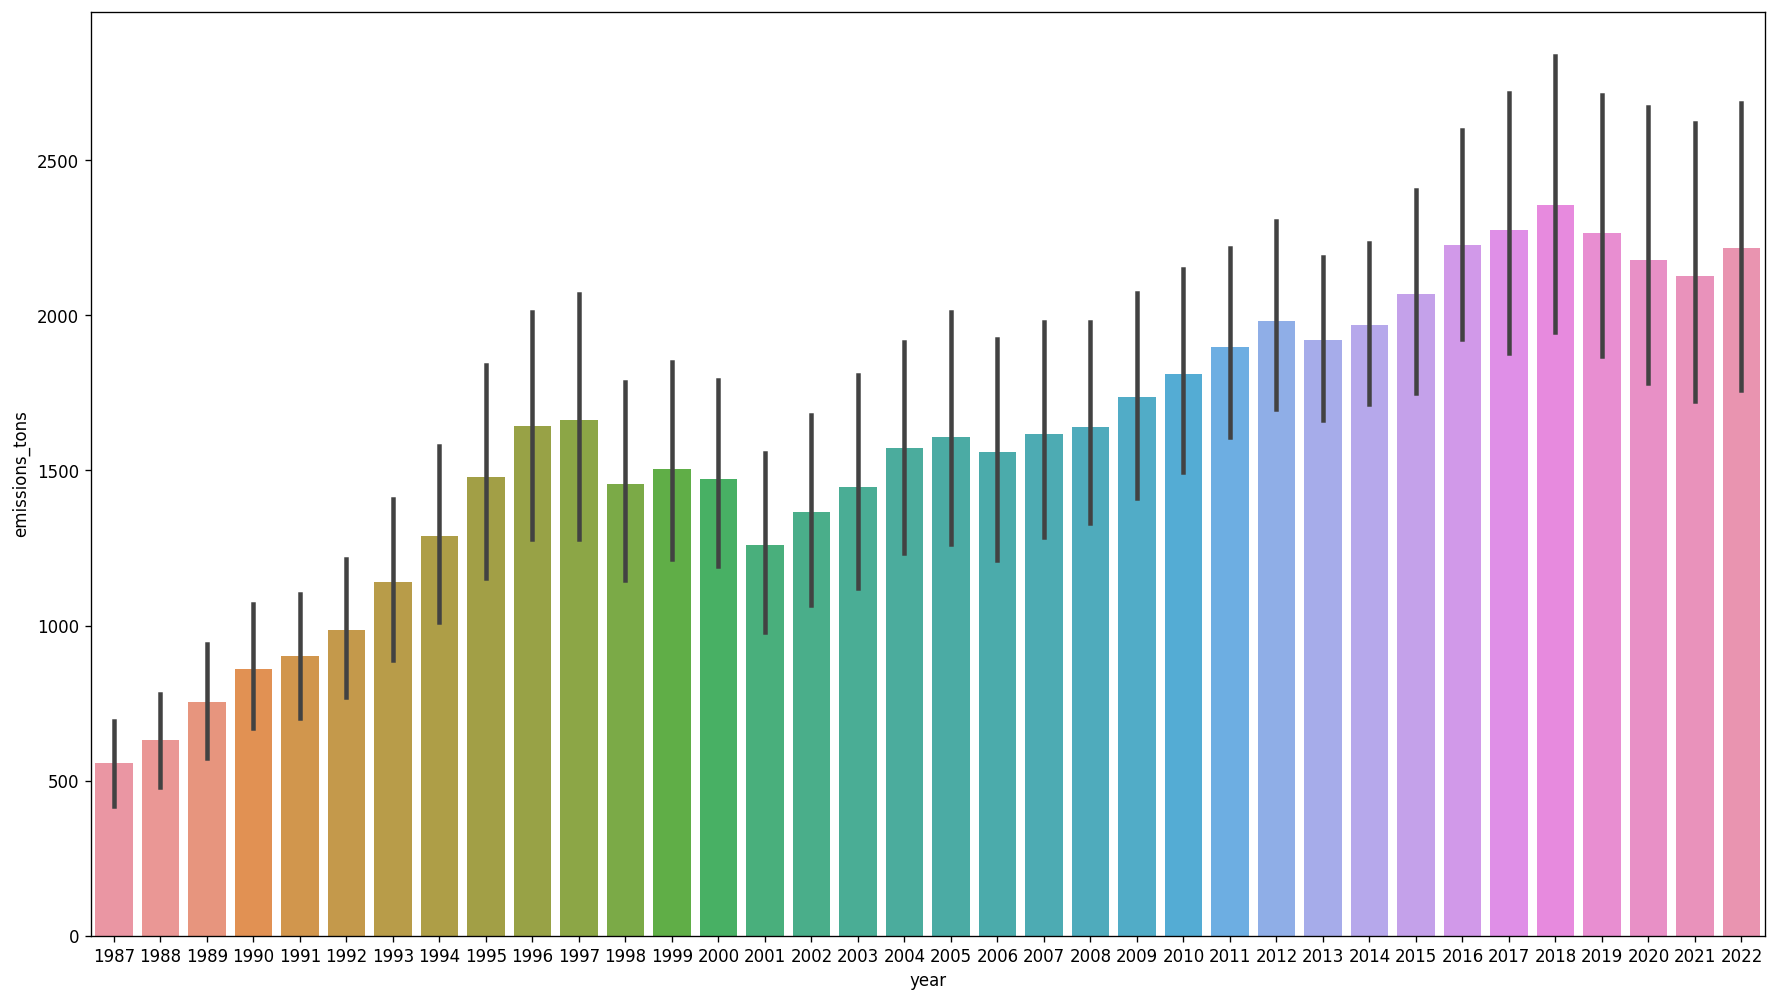

In [157]:
## TO CHECK WHICH YEAR EMITS MORE CO2 EMISSIONS:
## DISPLAYS AVERAGE AMOUNT

plt.figure(figsize=(18,10))

sns.barplot(x = 'year',
            y = 'emissions_tons',
            data = data)

# Show the plot
plt.show()



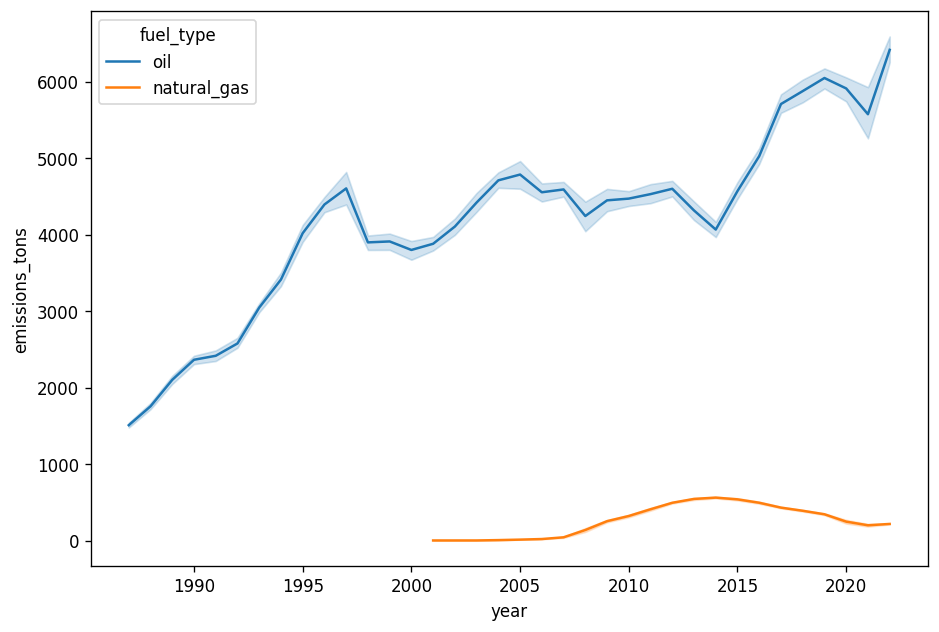

In [158]:
## PLOTTING THE CO2 EMISSIONS BY YEAR:

## FOR TRANSPORT:

sns.lineplot(x="year", y="emissions_tons",
             hue="fuel_type",
             data=transport_data)

plt.show()

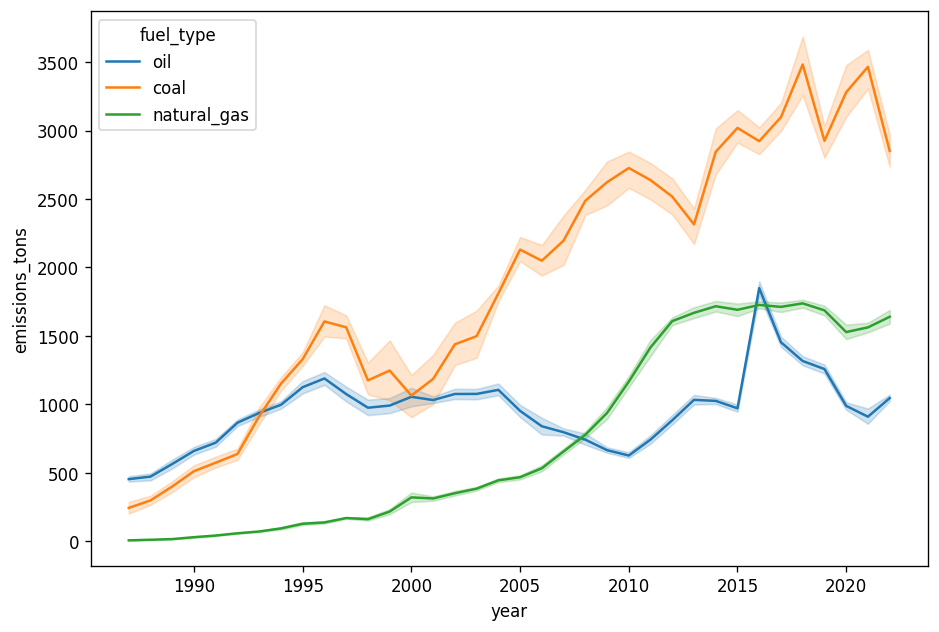

In [159]:
## PLOTTING THE CO2 EMISSIONS BY YEAR:

## FOR TRANSPORT:

sns.lineplot(x="year", y="emissions_tons",
             hue="fuel_type",
             data=industry_data)

plt.show()

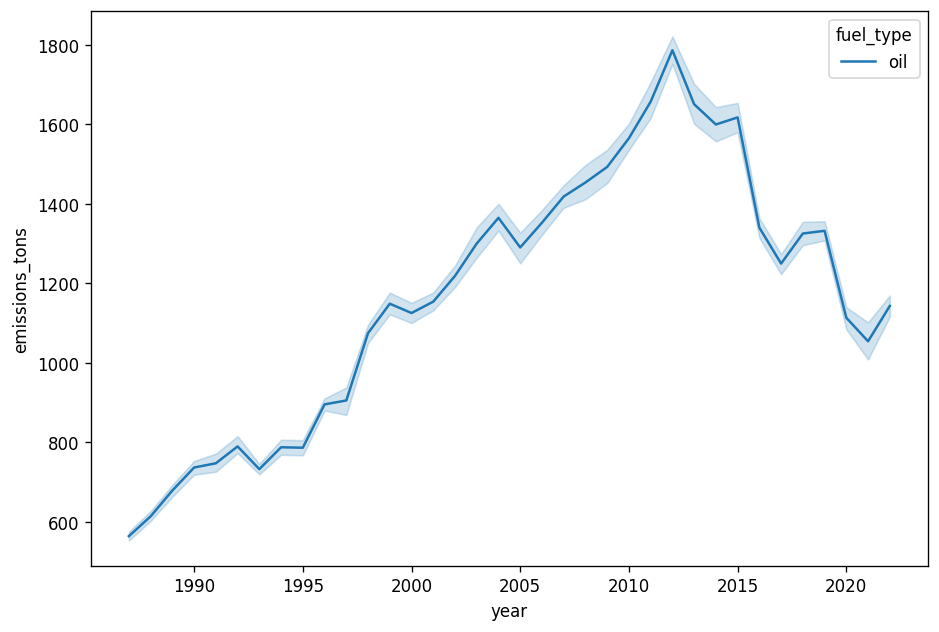

In [160]:
## PLOTTING THE CO2 EMISSIONS BY YEAR:

## FOR OTHER:

sns.lineplot(x="year", y="emissions_tons",
             hue="fuel_type",
             data=other_data
             )

plt.show()

### TIME SERIES

In [161]:
## RESTRUCTURING THE TRANSPORT DATASET:

## PREDICTING THE EMISSION OF CO2 FROM TRANSPORT:

transport_oil_data = transport_data.loc[transport_data['fuel_type'] == 'oil']


In [162]:
transport_oil_data

transport_oil_data = transport_oil_data.drop(['source','fuel_type'],axis=1)
transport_oil_data

year  month  emissions_tons
0    1987      1         1588.61
1    1987      2         1428.29
2    1987      3         1581.16
3    1987      4         1557.40
4    1987      5         1513.35
..    ...    ...             ...
427  2022      8         6276.48
428  2022      9         6147.11
429  2022     10         6354.09
430  2022     11         6654.37
431  2022     12         7076.27

[432 rows x 3 columns]

In [163]:
date_month = []


for i in range(0,len(transport_oil_data)):
  date_month.append(str(transport_oil_data['year'][i])+"-"+str(transport_oil_data['month'][i]))

print(date_month)

transport_oil_data['date'] = date_month
transport_oil_data["date"]=pd.to_datetime(transport_oil_data["date"])
transport_oil_data.set_index("date",inplace=True)
transport_oil_data

#data['date_column'] = pd.to_datetime(data['date_column'], format='%Y-%m')
#data['date_column'] = pd.to_datetime(data['date_column'])
#transport_oil_data['date'] = pd.to_datetime(transport_oil_data['date'])
#transport_oil_data['date'] = transport_oil_data['date'].apply(lambda x: x.strftime('%Y-%m-%d'))

#transport_oil_data= transport_oil_data.set_index('date')

['1987-1', '1987-2', '1987-3', '1987-4', '1987-5', '1987-6', '1987-7', '1987-8', '1987-9', '1987-10', '1987-11', '1987-12', '1988-1', '1988-2', '1988-3', '1988-4', '1988-5', '1988-6', '1988-7', '1988-8', '1988-9', '1988-10', '1988-11', '1988-12', '1989-1', '1989-2', '1989-3', '1989-4', '1989-5', '1989-6', '1989-7', '1989-8', '1989-9', '1989-10', '1989-11', '1989-12', '1990-1', '1990-2', '1990-3', '1990-4', '1990-5', '1990-6', '1990-7', '1990-8', '1990-9', '1990-10', '1990-11', '1990-12', '1991-1', '1991-2', '1991-3', '1991-4', '1991-5', '1991-6', '1991-7', '1991-8', '1991-9', '1991-10', '1991-11', '1991-12', '1992-1', '1992-2', '1992-3', '1992-4', '1992-5', '1992-6', '1992-7', '1992-8', '1992-9', '1992-10', '1992-11', '1992-12', '1993-1', '1993-2', '1993-3', '1993-4', '1993-5', '1993-6', '1993-7', '1993-8', '1993-9', '1993-10', '1993-11', '1993-12', '1994-1', '1994-2', '1994-3', '1994-4', '1994-5', '1994-6', '1994-7', '1994-8', '1994-9', '1994-10', '1994-11', '1994-12', '1995-1', '1995

year  month  emissions_tons
date                                   
1987-01-01  1987      1         1588.61
1987-02-01  1987      2         1428.29
1987-03-01  1987      3         1581.16
1987-04-01  1987      4         1557.40
1987-05-01  1987      5         1513.35
...          ...    ...             ...
2022-08-01  2022      8         6276.48
2022-09-01  2022      9         6147.11
2022-10-01  2022     10         6354.09
2022-11-01  2022     11         6654.37
2022-12-01  2022     12         7076.27

[432 rows x 3 columns]

In [164]:
transport_oil_data

year  month  emissions_tons
date                                   
1987-01-01  1987      1         1588.61
1987-02-01  1987      2         1428.29
1987-03-01  1987      3         1581.16
1987-04-01  1987      4         1557.40
1987-05-01  1987      5         1513.35
...          ...    ...             ...
2022-08-01  2022      8         6276.48
2022-09-01  2022      9         6147.11
2022-10-01  2022     10         6354.09
2022-11-01  2022     11         6654.37
2022-12-01  2022     12         7076.27

[432 rows x 3 columns]

In [165]:
transport_oil_data=transport_oil_data.drop(['year','month'],axis=1)


In [166]:
transport_oil_data.info

<bound method DataFrame.info of             emissions_tons
date                      
1987-01-01         1588.61
1987-02-01         1428.29
1987-03-01         1581.16
1987-04-01         1557.40
1987-05-01         1513.35
...                    ...
2022-08-01         6276.48
2022-09-01         6147.11
2022-10-01         6354.09
2022-11-01         6654.37
2022-12-01         7076.27

[432 rows x 1 columns]>

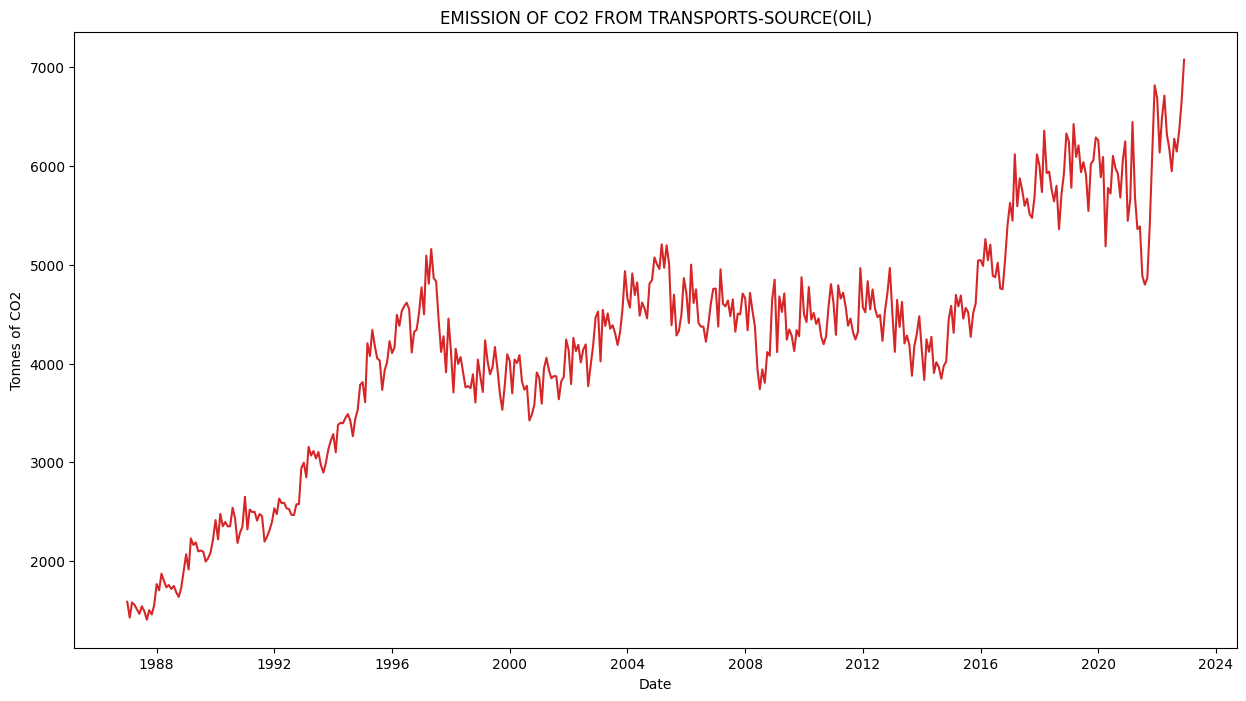

In [167]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Tonnes of CO2', dpi=100):
    plt.figure(figsize=(15,8), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(transport_oil_data, x=transport_oil_data.index, y=transport_oil_data['emissions_tons'], title='EMISSION OF CO2 FROM TRANSPORTS-SOURCE(OIL)')

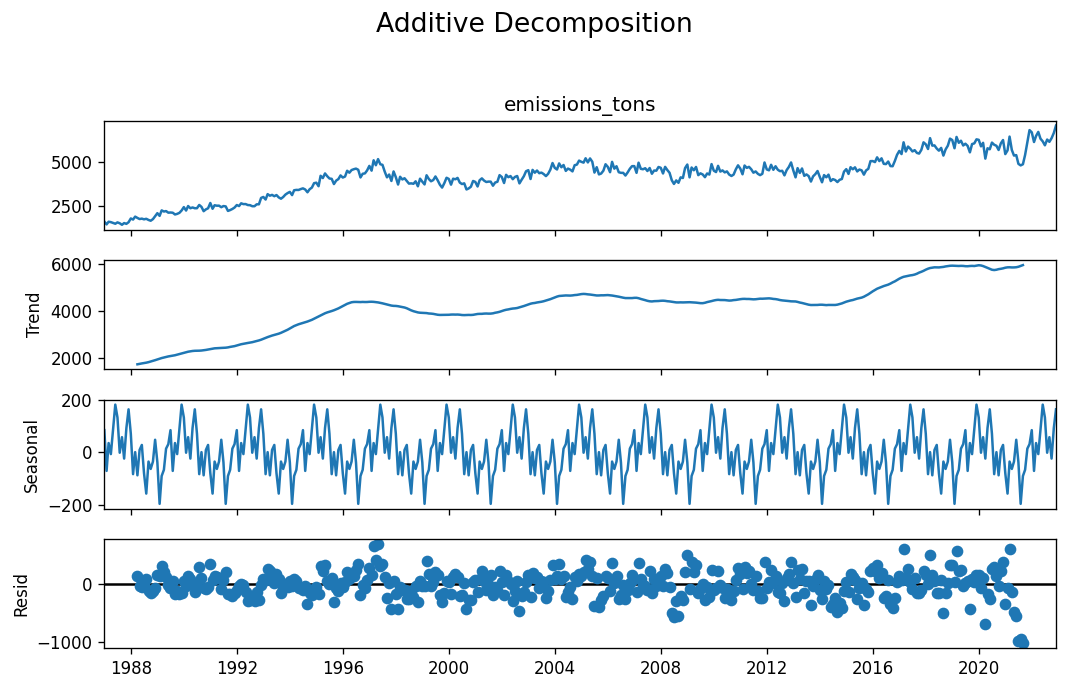

In [168]:
## DECOMPOSITION OF TIME SERIES:
## CHECKING HOW THE TIME SERIES IS MADE OF

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


## ADDITIVE

additive_decomposition = seasonal_decompose(transport_oil_data['emissions_tons'], model='additive', period=30)

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


## MULTIPL

In [169]:
transport_oil_data.index

DatetimeIndex(['1987-01-01', '1987-02-01', '1987-03-01', '1987-04-01',
               '1987-05-01', '1987-06-01', '1987-07-01', '1987-08-01',
               '1987-09-01', '1987-10-01',
               ...
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', name='date', length=432, freq=None)

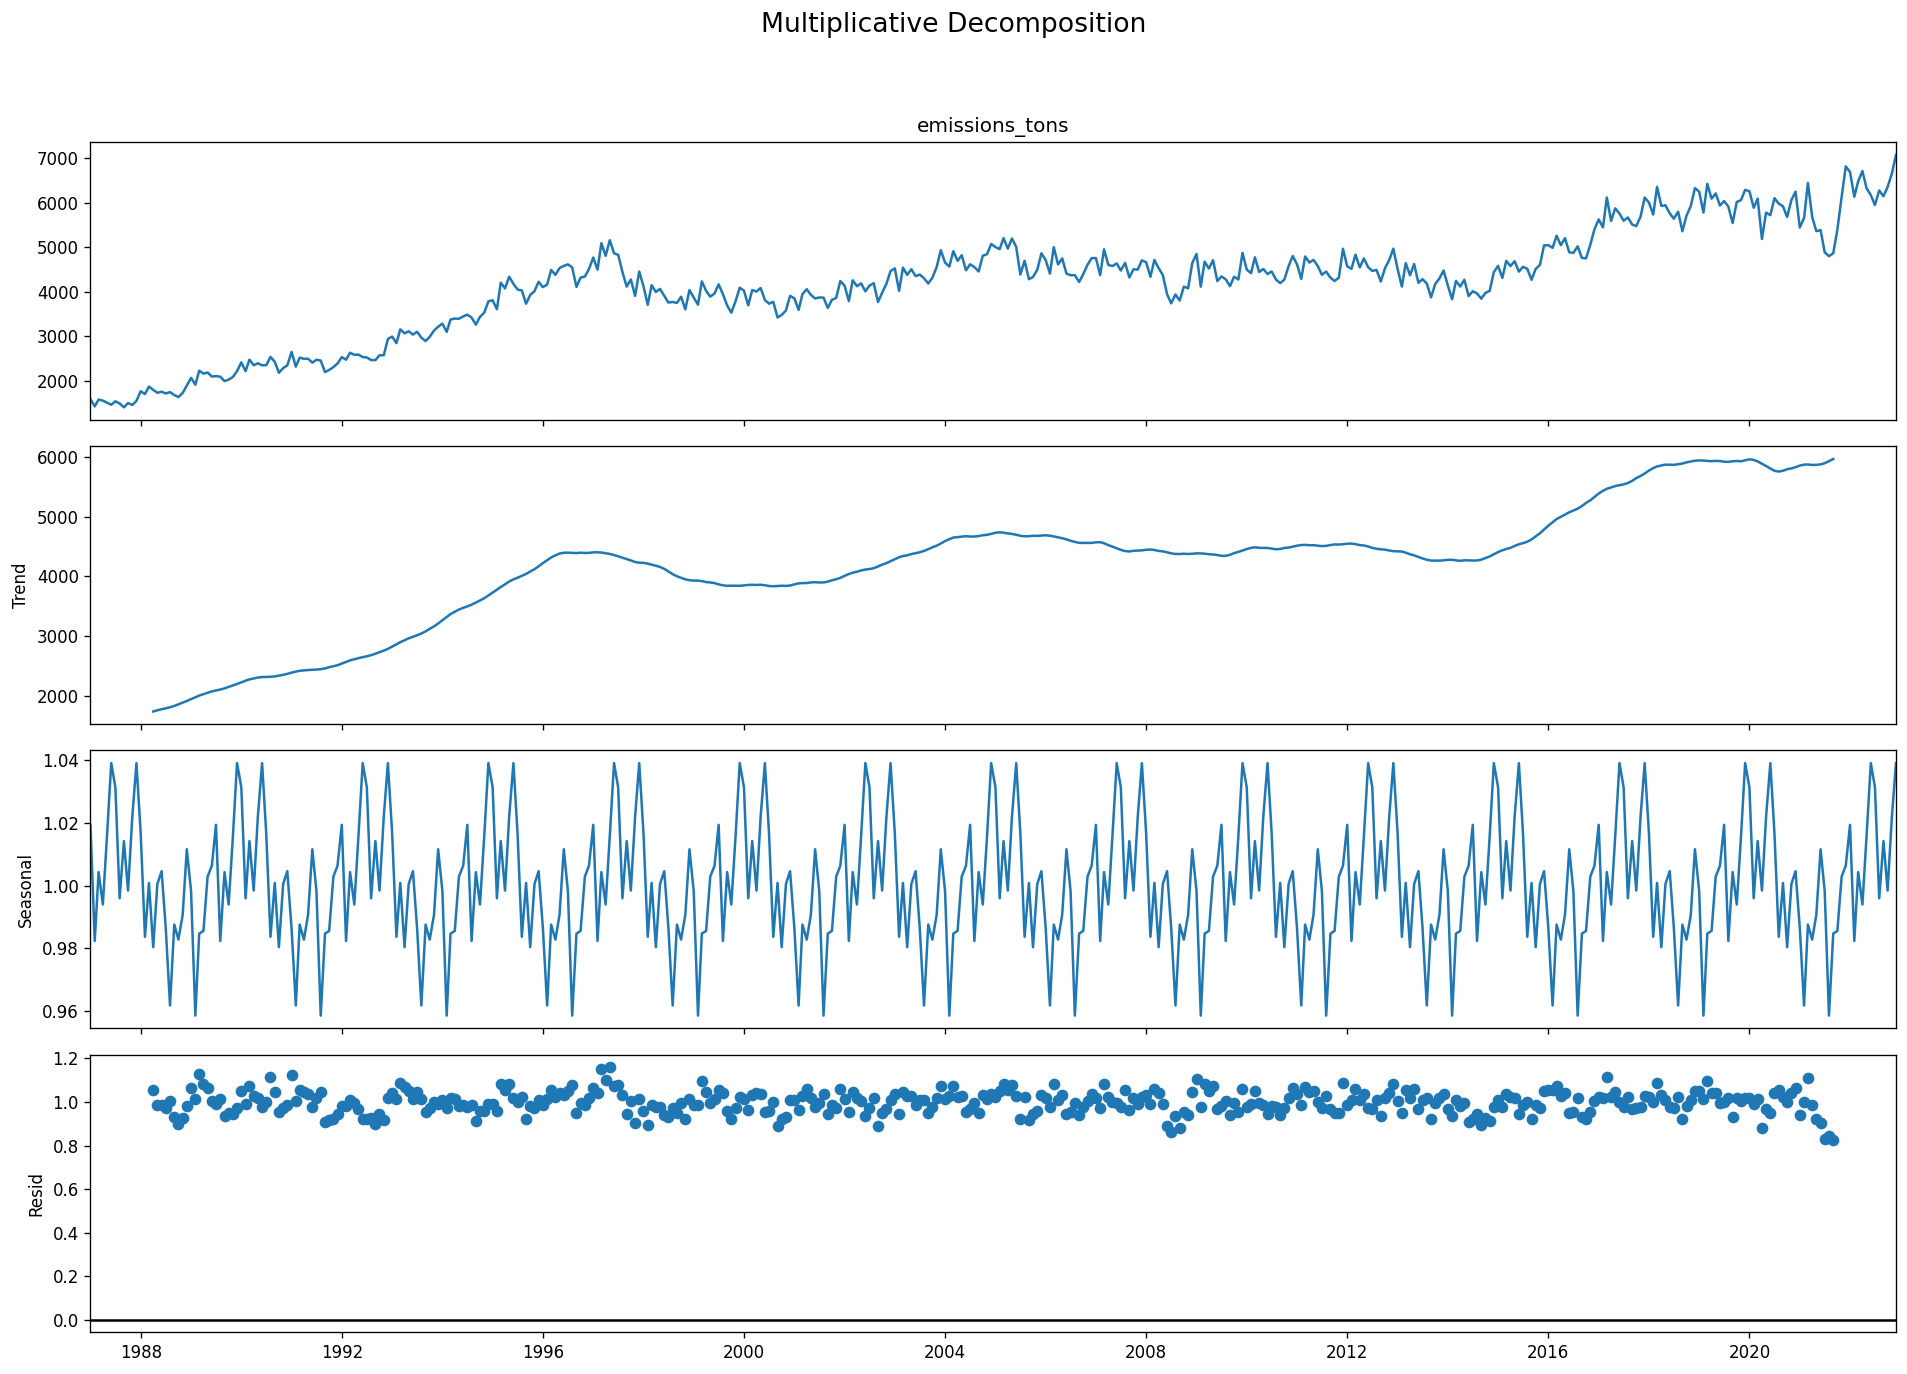

In [170]:
## MULTIPLICATIVE MODEL:



multiplicative_decomposition = seasonal_decompose(transport_oil_data['emissions_tons'], model='multiplicative', period=30)

plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

If we look at the residuals of the additive decomposition closely, it has some pattern left over.

The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

### CHECKING FOR STATIONARITY


In [171]:
from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is stored in a pandas Series called 'series'
result = adfuller(transport_oil_data['emissions_tons'])

# Extract and print the p-value
p_value = result[1]
print("ADF p-value:", p_value)

if  (p_value) > 0.05:
  print("SERIES IS NOT STATIONARY")
else:
  print("SERIES IS STATIONARY")

ADF p-value: 0.6871519432545015
SERIES IS NOT STATIONARY


In [172]:
## STEPS FOR CONVERTING THE NON STATIONARY TO STATIONARY:


## TAKING THE DIFFERENCING THE SERIES:


transport_oil_data['Differenced'] = transport_oil_data['emissions_tons'].diff().dropna()



In [173]:
transport_oil_data['Differenced']=transport_oil_data['Differenced'].dropna()

In [174]:
diff = transport_oil_data['Differenced'].dropna()

In [175]:
## AFTER DIFFERENCING :
## CHECKING FOR STATIONARY:

from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is stored in a pandas Series called 'series'
result = adfuller(diff)

# Extract and print the p-value
p_value = result[1]
print("ADF p-value:", p_value)

if  (p_value) > 0.05:
  print("SERIES IS NOT STATIONARY")
else:
  print("SERIES IS STATIONARY")



ADF p-value: 0.0029562944166281286
SERIES IS STATIONARY


DATA IS STATIONARY , BUT NEED TO CHECK AGAIN FOR SEASONAL RESIDUALS


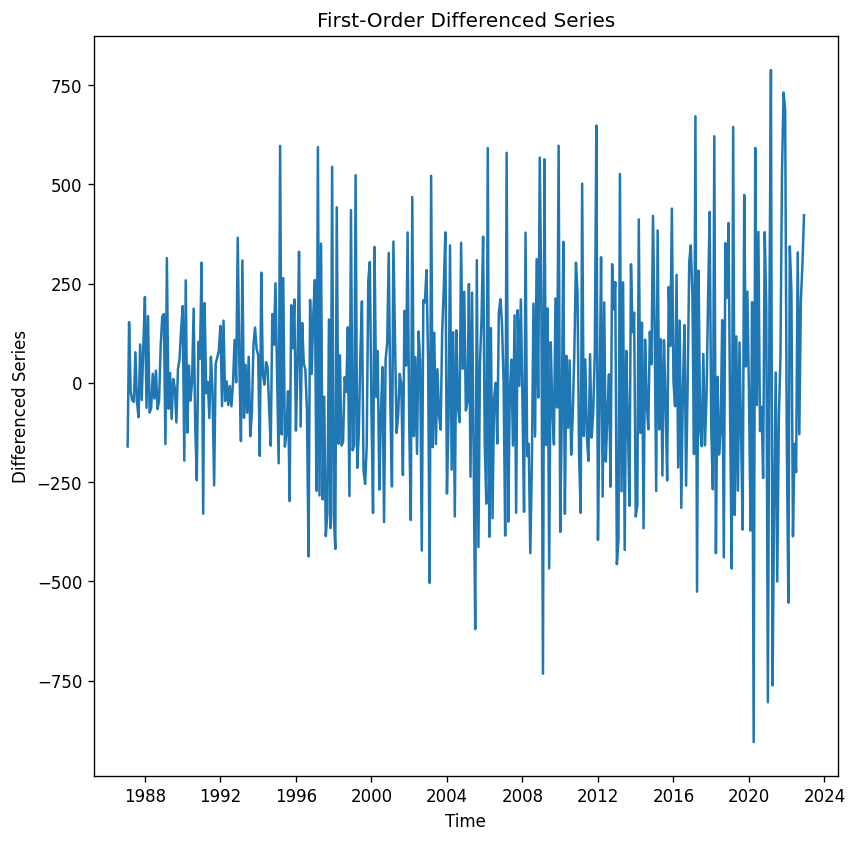

In [176]:
differenced_series = pd.Series(diff)  # Replace [...] with your actual differenced series

# Plot the differenced series
plt.figure(figsize=(8,8))
plt.plot(differenced_series)
plt.xlabel('Time')
plt.ylabel('Differenced Series')
plt.title('First-Order Differenced Series')
plt.show()

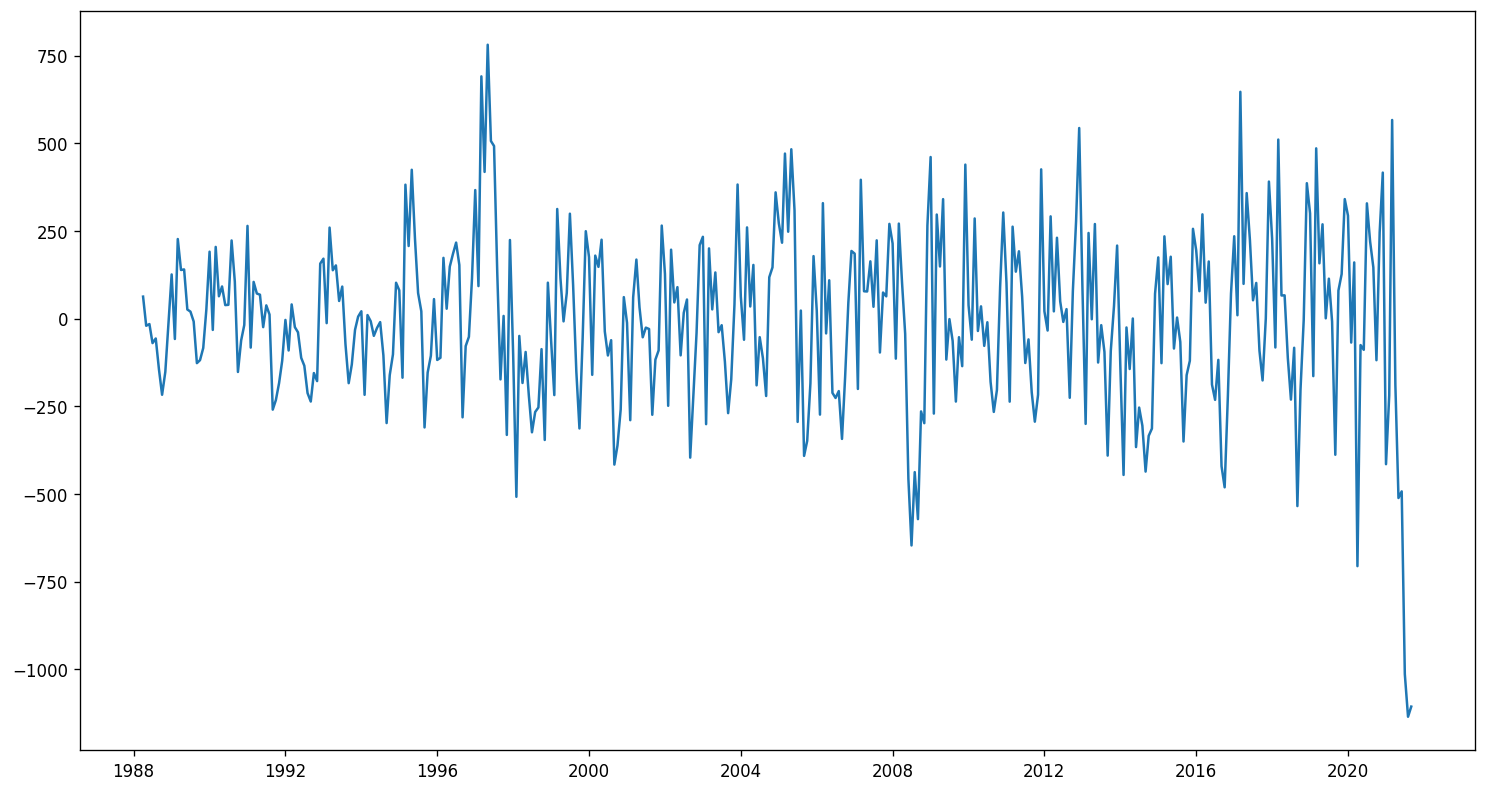

In [177]:
## USING STATS MODEL:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(transport_oil_data['emissions_tons'], model='multiplicative', period=30)
detrended = transport_oil_data['emissions_tons'].values - result_mul.trend
plt.figure(figsize=(15,8))
#plt.subplots_adjust(left=9
#                    , right=10.0, bottom=0.1, top=0.9)
plt.plot(detrended)
#plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)
#plt.xticks(rotation=45)
#plt.xticks(fontsize=8)



[]

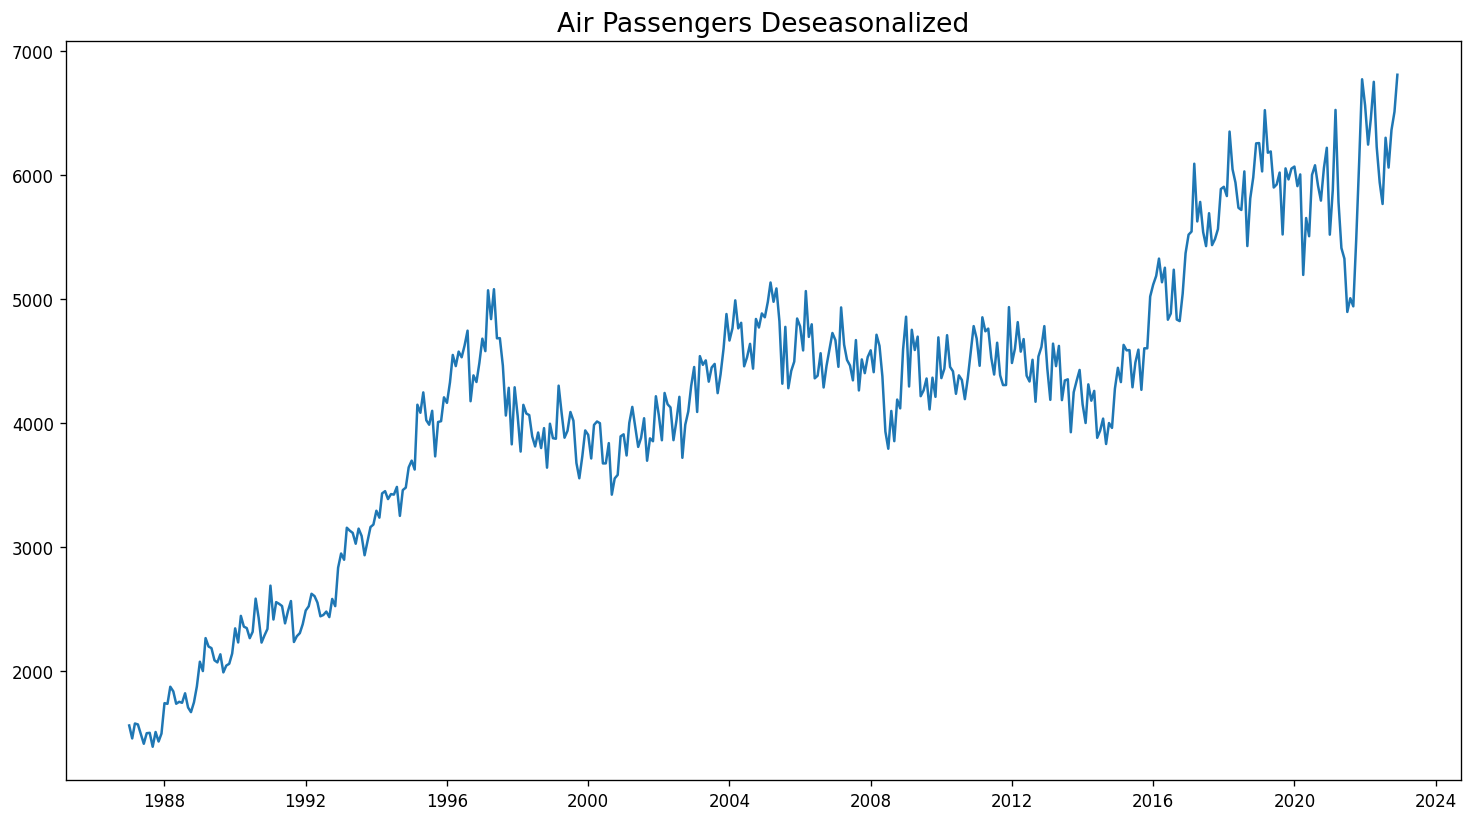

In [178]:
## STEP 2: => Deseasonalizing the series

# Time Series Decomposition
result_mul = seasonal_decompose(transport_oil_data['emissions_tons'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = transport_oil_data['emissions_tons'].values / result_mul.seasonal


# Plot
plt.figure(figsize=(15,8))
plt.plot(deseasonalized)

plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot()

### FORECASTING


In [179]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

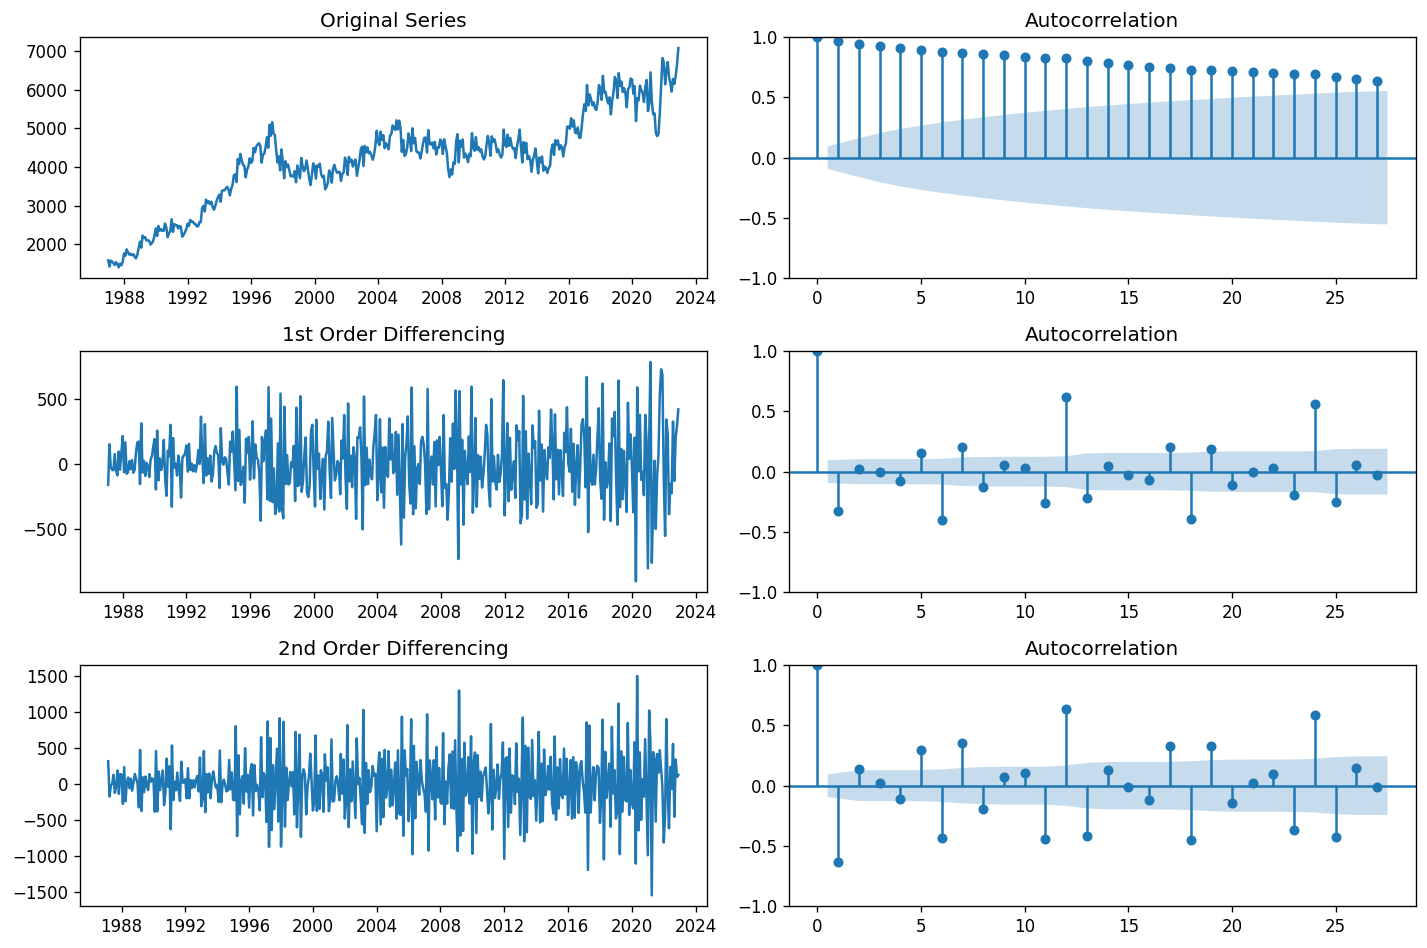

In [180]:
## IMPLEMENTING THE ARIMA MODEL:

## CALCULATING THE TERMS OF ARIMA:

plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(transport_oil_data['emissions_tons']); axes[0, 0].set_title('Original Series')
plot_acf(transport_oil_data['emissions_tons'].values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(transport_oil_data['emissions_tons'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(transport_oil_data['emissions_tons'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(transport_oil_data['emissions_tons'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(transport_oil_data['emissions_tons'].diff().diff().dropna(), ax=axes[2, 1])

plt.tight_layout()
plt.show()











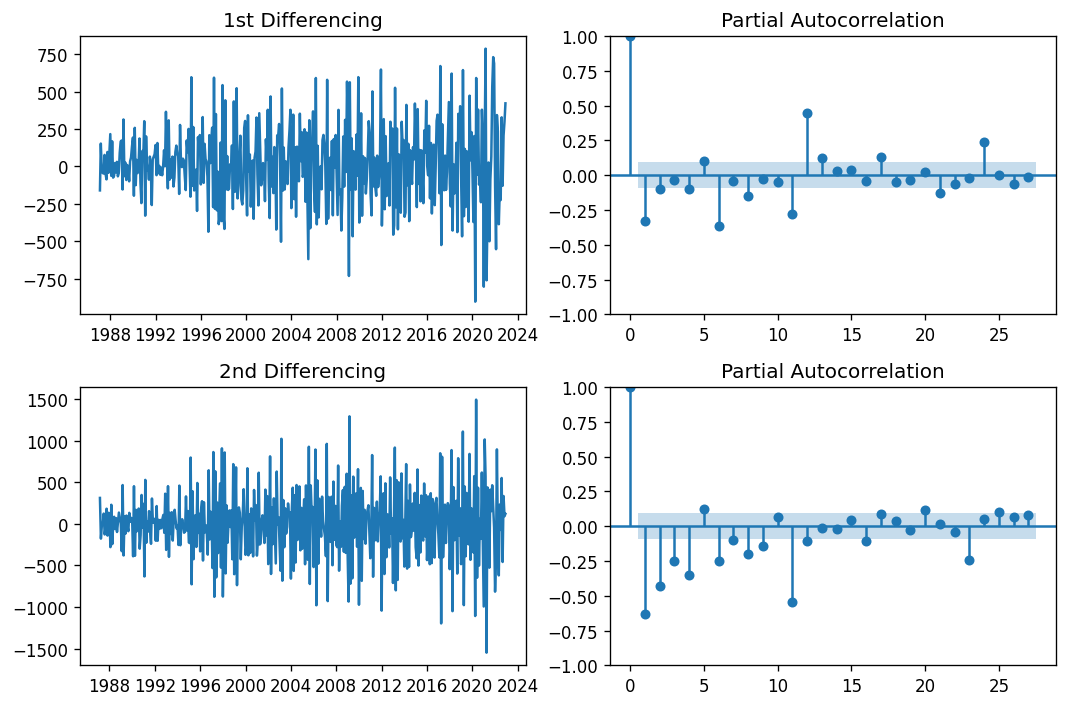

In [181]:
##FOR IMPLEMENTING ARIMA MODEL

plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=False)

# PACF plot of 1st differenced series
axes[0,0].plot(transport_oil_data['emissions_tons'].diff()); axes[0,0].set_title('1st Differencing')
axes[0,1].set(ylim=(0,5))
plot_pacf(transport_oil_data['emissions_tons'].diff().dropna(), ax=axes[0,1])

# PACF plot of 2nd differenced series
axes[1,0].plot(transport_oil_data['emissions_tons'].diff().diff()); axes[1,0].set_title('2nd Differencing')
axes[1,1].set(ylim=(0,5))
plot_pacf(transport_oil_data['emissions_tons'].diff().diff().dropna(), ax=axes[1,1])
plt.tight_layout()
plt.show()

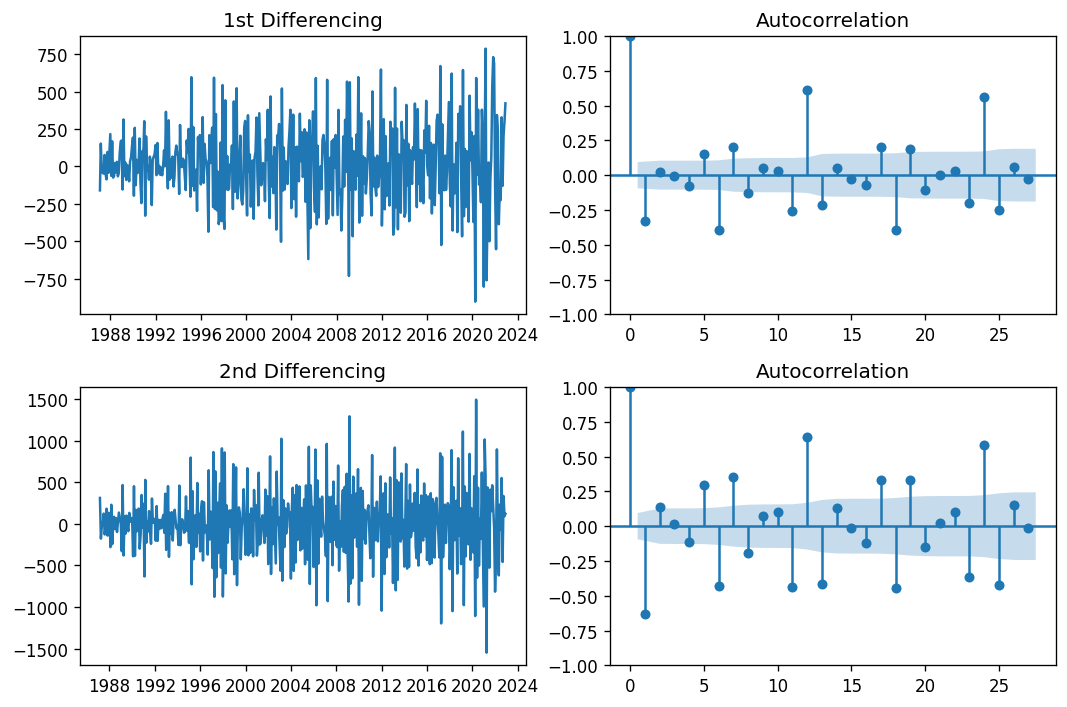

In [182]:
plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=False)

# ACF plot of 1st differenced series
axes[0,0].plot(transport_oil_data['emissions_tons'].diff()); axes[0,0].set_title('1st Differencing')
axes[0,1].set(ylim=(0,5))
plot_acf(transport_oil_data['emissions_tons'].diff().dropna(), ax=axes[0,1])

# ACF plot of 2nd differenced series
axes[1,0].plot(transport_oil_data['emissions_tons'].diff().diff()); axes[1,0].set_title('2nd Differencing')
axes[1,1].set(ylim=(0,5))
plot_acf(transport_oil_data['emissions_tons'].diff().diff().dropna(), ax=axes[1,1])
plt.tight_layout()
plt.show()

In [183]:
!pip install pmdarima


In [184]:
# After install pmdarima, import auto_arima to train model

#pip install pmdarima
from pmdarima.arima import auto_arima

# Tunning parameters, and specified number of ARIMA models to be fit is 50

arima_model=auto_arima(transport_oil_data['emissions_tons'],start_p=1,d=1,start_q=1,
                       max_p=5,max_q=5,max_d=5,m=12,
                       start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                       seasonal=True,
                       trace=True,
                       error_action="ignore",
                       suppress_warnings=True,
                       stepwise=True,n_fits=50)

In [185]:
arima_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  432
Model:             SARIMAX(0, 1, 1)x(3, 1, [1, 2], 12)   Log Likelihood               -2203.230
Date:                                 Sun, 20 Aug 2023   AIC                           4420.459
Time:                                         20:33:48   BIC                           4448.724
Sample:                                     01-01-1987   HQIC                          4431.632
                                          - 12-01-2022                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3213      0.047     -6.862      0.000      -0.413      -0.230
ar.S.L12      -0.6718      0.166     -4.037      0.000      -0.998      -0.346
ar.S.L24      -0.1433      0.056     -2.540      0.011      -0.254      -0.033
ar.S.L36      -0.2235      0.045     -4.978      0.000      -0.311      -0.135
ma.S.L12      -0.0528      0.159     -0.331      0.741      -0.365       0.260
ma.S.L24      -0.5551      0.137     -4.065      0.000      -0.823      -0.287
sigma2      2086.3259     67.660     30.835      0.000    1953.714    2218.938
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2081.79
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.67   Skew:                            -1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [186]:
size=int(len(transport_oil_data['emissions_tons'])*0.66)
X_train,X_test=transport_oil_data['emissions_tons'][0:size],transport_oil_data['emissions_tons'][size:len(transport_oil_data['emissions_tons'])]

In [187]:
X_train.shape


(285,)

In [188]:
X_test.shape


(147,)

In [189]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [190]:
model=SARIMAX(transport_oil_data['emissions_tons'],
             order=(0,1,1),
             seasonal_order=(0,1,1,12))
result=model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     emissions_tons   No. Observations:                  432
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2752.341
Date:                            Sun, 20 Aug 2023   AIC                           5510.683
Time:                                    20:33:50   BIC                           5522.797
Sample:                                01-01-1987   HQIC                          5515.471
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2948      0.033     -8.982      0.000      -0.359      -0.230
ma.S.L12      -0.8353      0.026    -32.061      0.000      -0.886      -0.784
sigma2      2.873e+04   1378.461     20.842      0.000     2.6e+04    3.14e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               176.68
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               2.83   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [191]:
start_index=0
end_index=len(X_train)-1
train_predction=result.predict(start_index,end_index)
train_predction

1987-01-01       0.000000
1987-02-01    1577.482791
1987-03-01    1430.327586
1987-04-01    1579.099834
1987-05-01    1557.696390
                 ...     
2010-05-01    4554.638222
2010-06-01    4285.606900
2010-07-01    4300.590817
2010-08-01    4451.080369
2010-09-01    4112.089032
Freq: MS, Name: predicted_mean, Length: 285, dtype: float64

In [192]:
st_index=len(X_train)

ed_index=len(transport_oil_data['emissions_tons'])-1
predction=result.predict(st_index,ed_index)
predction

2010-10-01    4351.803990
2010-11-01    4343.698397
2010-12-01    4873.058923
2011-01-01    4748.365131
2011-02-01    4355.056496
                 ...     
2022-08-01    5987.978671
2022-09-01    6009.089912
2022-10-01    6307.138859
2022-11-01    6608.333486
2022-12-01    7027.272976
Freq: MS, Name: predicted_mean, Length: 147, dtype: float64

In [193]:
X_test.index = predction.index

<Axes: >

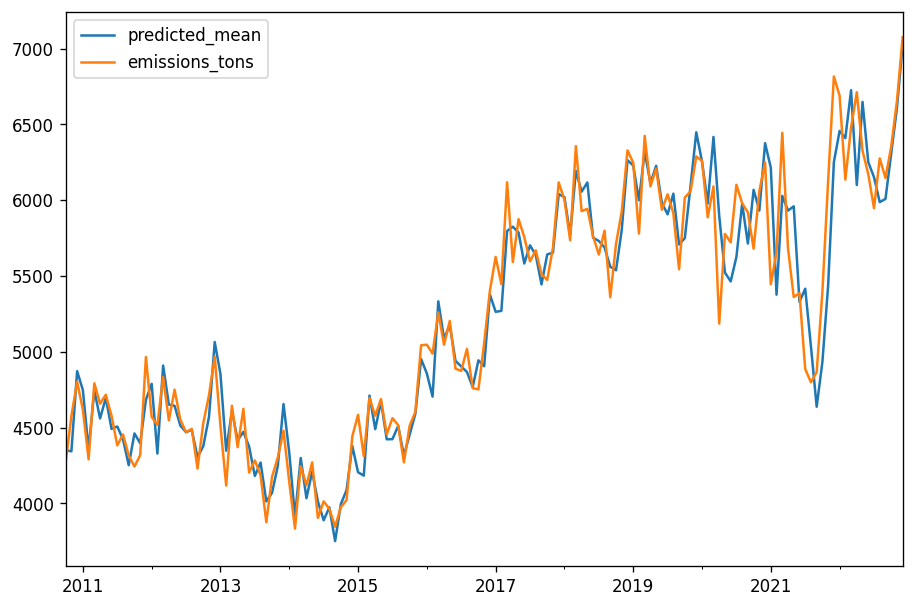

In [194]:
predction.plot(legend=True)
X_test.plot(legend=True)


In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [196]:
#(171.08234221070873, 213.55745061469455)
trainScore=math.sqrt(mean_squared_error(X_train,train_predction))
testScore=math.sqrt(mean_squared_error(X_test,predction))
trainScore,testScore

(170.72089797450926, 178.567354896)

In [197]:
forcast=result.predict(start=len(transport_oil_data['emissions_tons']),
                      end=(len(transport_oil_data['emissions_tons'])-1)+3*12,
                      typ="levels").rename('Forecust')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


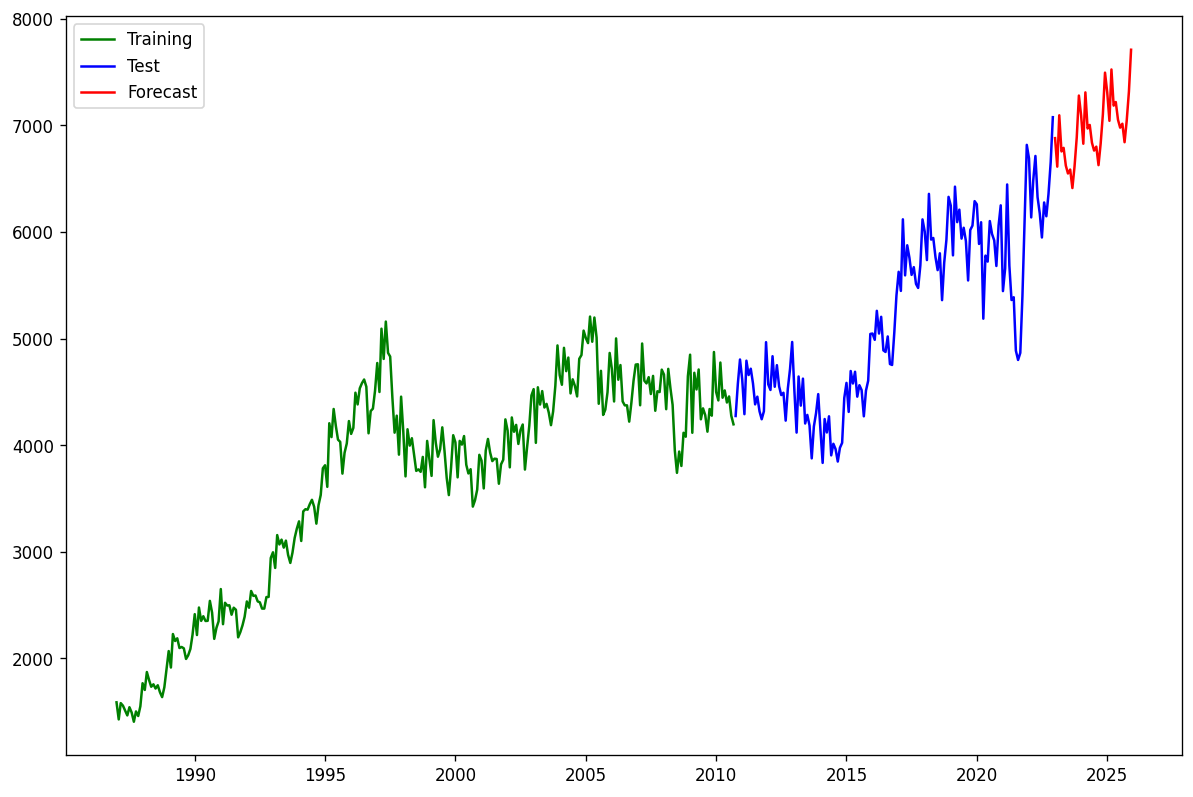

In [198]:
plt.figure(figsize=(12,8))
plt.plot(X_train,label="Training",color='green')
plt.plot(X_test,label="Test",color='blue')
plt.plot(forcast,label="Forecast",color="red")
plt.legend(loc="upper left")

In [199]:
print(X_train.index)
print(predction.index)

DatetimeIndex(['1987-01-01', '1987-02-01', '1987-03-01', '1987-04-01',
               '1987-05-01', '1987-06-01', '1987-07-01', '1987-08-01',
               '1987-09-01', '1987-10-01',
               ...
               '2009-12-01', '2010-01-01', '2010-02-01', '2010-03-01',
               '2010-04-01', '2010-05-01', '2010-06-01', '2010-07-01',
               '2010-08-01', '2010-09-01'],
              dtype='datetime64[ns]', name='date', length=285, freq=None)
DatetimeIndex(['2010-10-01', '2010-11-01', '2010-12-01', '2011-01-01',
               '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01',
               '2011-06-01', '2011-07-01',
               ...
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', length=147, freq='MS')


In [200]:
print("FORECASTED VALUES:")
print(forcast)


FORECASTED VALUES:
2023-01-01    6879.924421
2023-02-01    6612.302100
2023-03-01    7094.054675
2023-04-01    6754.795537
2023-05-01    6788.780952
2023-06-01    6621.922498
2023-07-01    6548.165793
2023-08-01    6585.272571
2023-09-01    6411.660974
2023-10-01    6613.411911
2023-11-01    6886.799491
2023-12-01    7279.108870
2024-01-01    7094.829685
2024-02-01    6827.207364
2024-03-01    7308.959940
2024-04-01    6969.700802
2024-05-01    7003.686217
2024-06-01    6836.827763
2024-07-01    6763.071058
2024-08-01    6800.177835
2024-09-01    6626.566238
2024-10-01    6828.317175
2024-11-01    7101.704756
2024-12-01    7494.014134
2025-01-01    7309.734950
2025-02-01    7042.112629
2025-03-01    7523.865204
2025-04-01    7184.606066
2025-05-01    7218.591481
2025-06-01    7051.733027
2025-07-01    6977.976322
2025-08-01    7015.083100
2025-09-01    6841.471503
2025-10-01    7043.222440
2025-11-01    7316.610020
2025-12-01    7708.919399
Freq: MS, Name: Forecust, dtype: float64


### INDUSTRY:

In [201]:
## FORECASTING THE INDUSTRY - OIL EMISSIONS:




industry_oil_data = industry_data.loc[industry_data['fuel_type'] == 'oil']
industry_oil_data = industry_oil_data.drop(['source','fuel_type'],axis=1)

industry_oil_data

year  month  emissions_tons
432  1987      1          531.26
433  1987      2          408.65
434  1987      3          444.82
435  1987      4          433.29
436  1987      5          495.61
..    ...    ...             ...
859  2022      8         1041.70
860  2022      9          996.27
861  2022     10         1053.18
862  2022     11         1075.07
863  2022     12         1126.34

[432 rows x 3 columns]

In [202]:
industry_oil_data_2 = industry_oil_data.copy()


In [ ]:
# import matplotlib.cm as cm

# industry_oil_data_2['Month'] = industry_oil_data_2.index.month
# industry_oil_data_2['Year'] = industry_oil_data_2.index.year

# # Get unique years
# years = industry_oil_data_2['Year'].unique()

# # Create a colormap for the years
# colors = cm.rainbow_r([i / len(years) for i in range(len(years))])

# fig, ax = plt.subplots()

# for year, color in zip(years, colors):
#     data = industry_oil_data_2[industry_oil_data_2['Year'] == year]
#     ax.plot(data['Month'], data['emissions_tons'], label=str(year), color=color, marker='o')

# ax.set_xlabel('Month')
# ax.set_ylabel('Number of Passengers')
# ax.set_title('Passenger Count vs Month')
# ax.legend(title='Year')
# plt.show()



In [203]:
industry_oil_data['date'] = date_month
industry_oil_data["date"]=pd.to_datetime(industry_oil_data["date"])
industry_oil_data.set_index("date",inplace=True)
industry_oil_data

year  month  emissions_tons
date                                   
1987-01-01  1987      1          531.26
1987-02-01  1987      2          408.65
1987-03-01  1987      3          444.82
1987-04-01  1987      4          433.29
1987-05-01  1987      5          495.61
...          ...    ...             ...
2022-08-01  2022      8         1041.70
2022-09-01  2022      9          996.27
2022-10-01  2022     10         1053.18
2022-11-01  2022     11         1075.07
2022-12-01  2022     12         1126.34

[432 rows x 3 columns]

In [204]:
print(industry_oil_data.columns)
industry_oil_data = industry_oil_data.drop(['year','month'],axis=1)

Index(['year', 'month', 'emissions_tons'], dtype='object')


In [205]:
industry_oil_data.head(5)

emissions_tons
date                      
1987-01-01          531.26
1987-02-01          408.65
1987-03-01          444.82
1987-04-01          433.29
1987-05-01          495.61

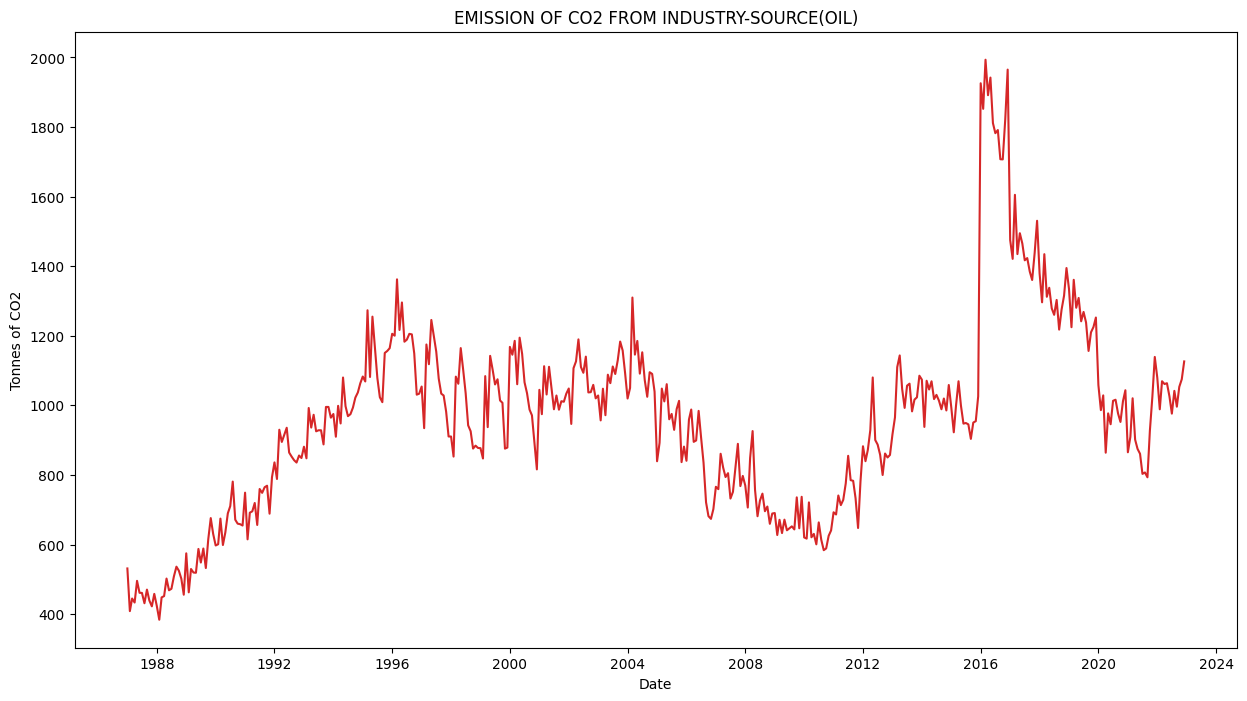

In [206]:
### Visualizing the series:


def plot_df(df, x, y, title="", xlabel='Date', ylabel='Tonnes of CO2', dpi=100):
    plt.figure(figsize=(15,8), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(industry_oil_data, x=industry_oil_data.index, y=industry_oil_data['emissions_tons'], title='EMISSION OF CO2 FROM INDUSTRY-SOURCE(OIL)')





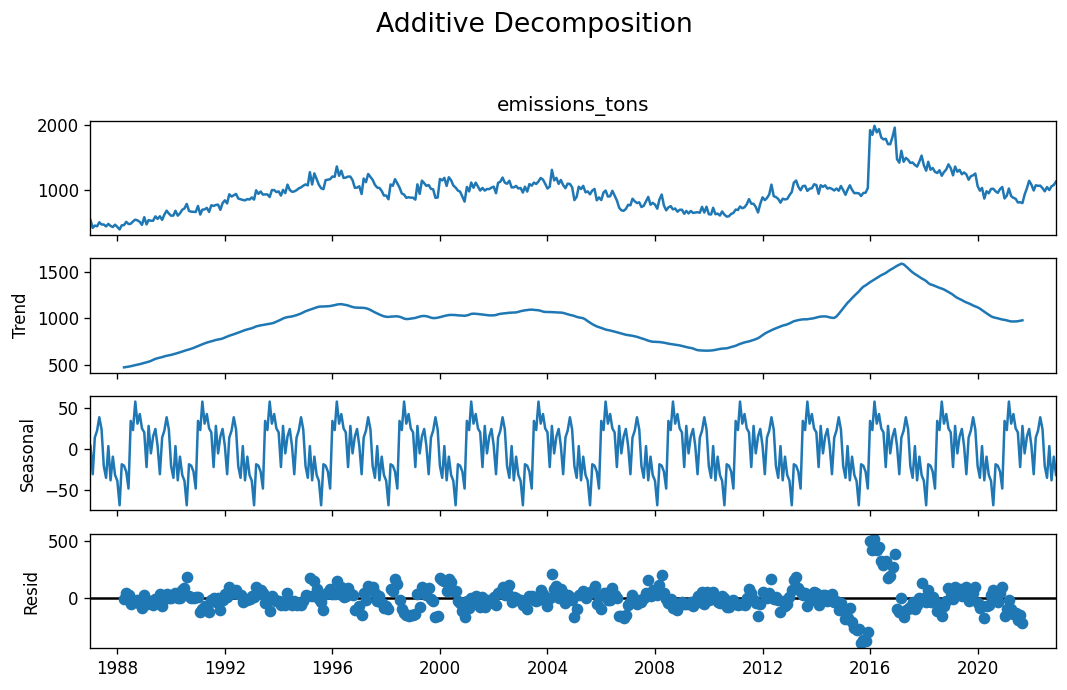

In [207]:
## DECOMPOSITION OF TIME SERIES:
## CHECKING HOW THE TIME SERIES IS MADE OF

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


## ADDITIVE

additive_decomposition = seasonal_decompose(industry_oil_data['emissions_tons'], model='additive', period=30)

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


## MULTIPL

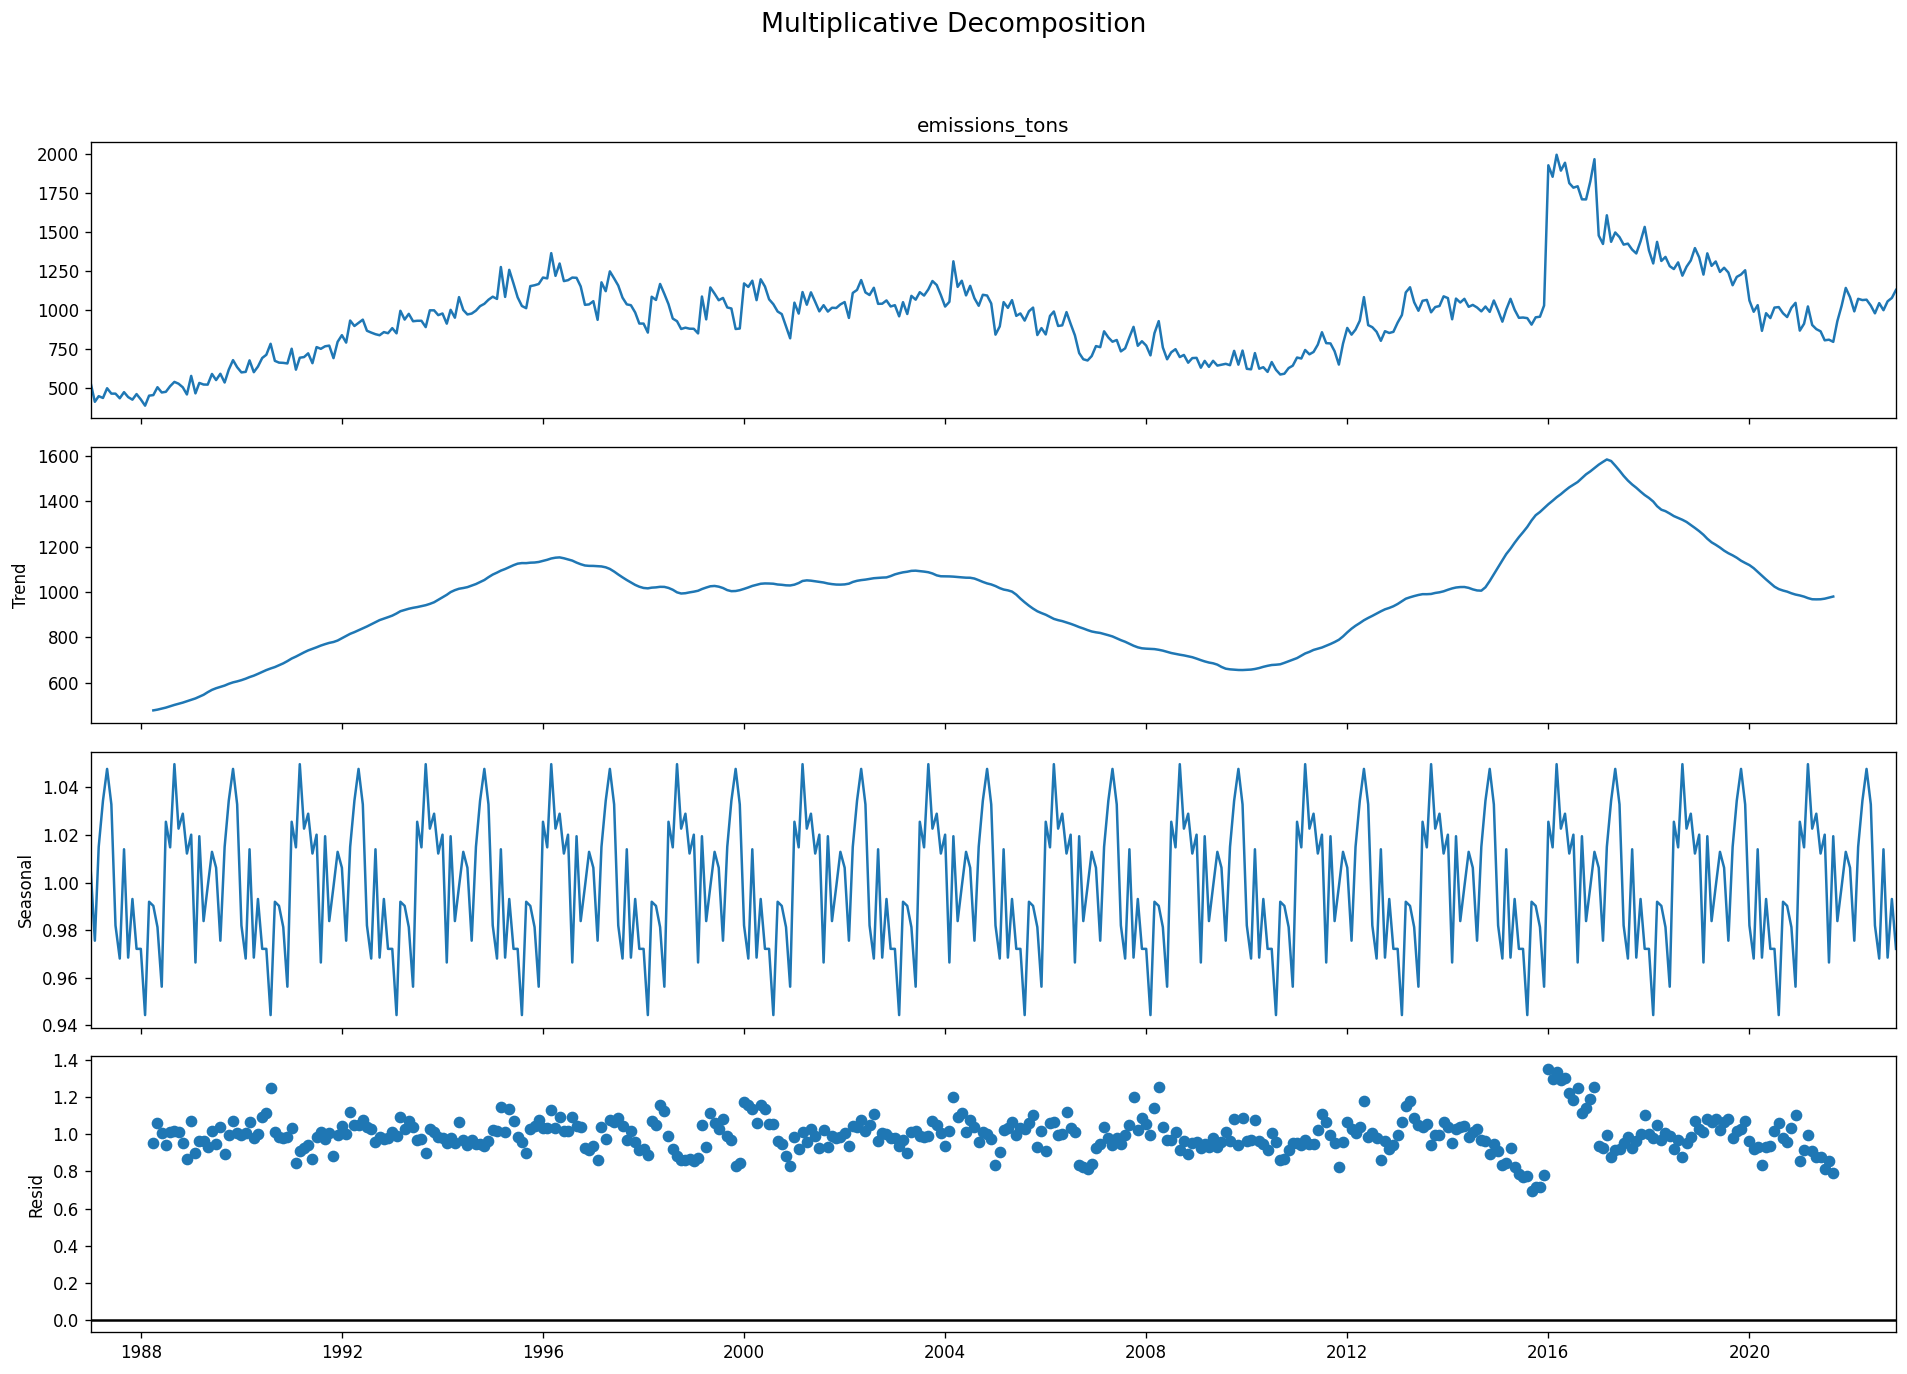

In [208]:
## MULTIPLICATIVE MODEL:



multiplicative_decomposition = seasonal_decompose(industry_oil_data['emissions_tons'], model='multiplicative', period=30)

plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

If we look at the residuals of the additive decomposition closely, it has some pattern left over.

The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

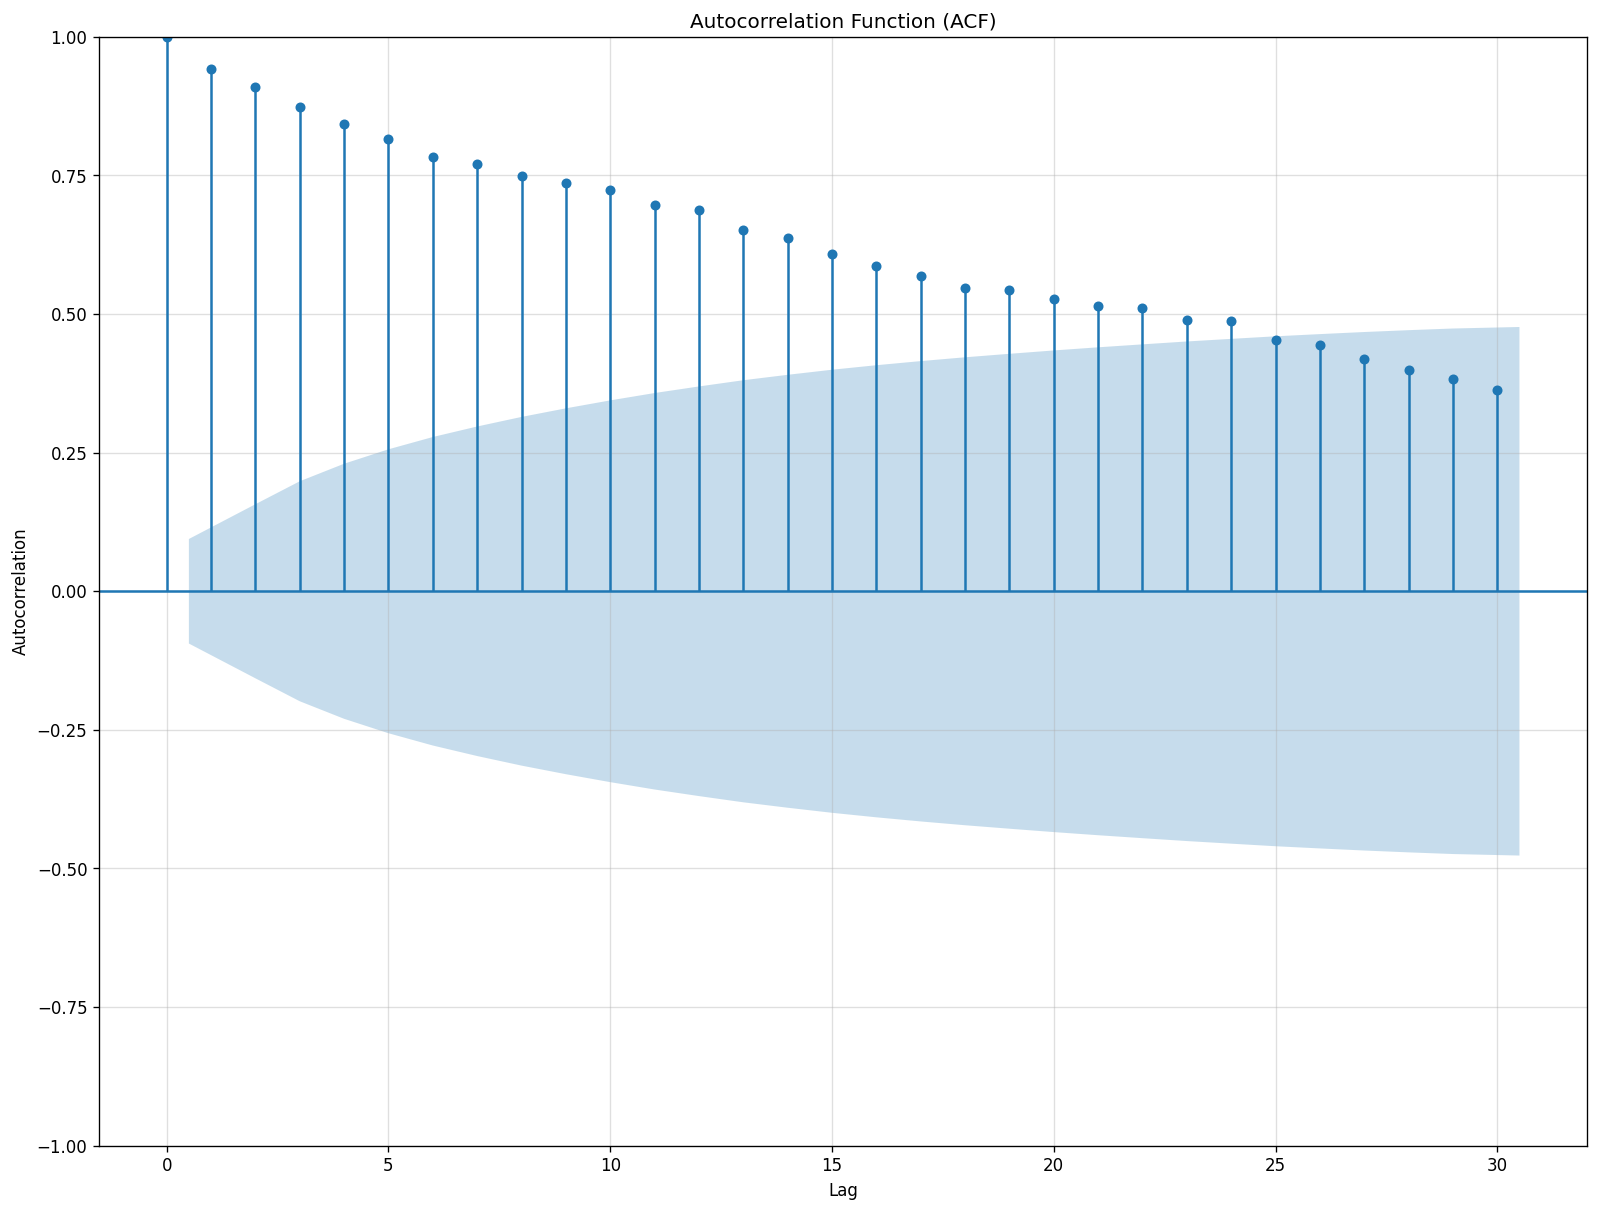

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming you have a DataFrame 'df' with a time series column named 'Data'
data = industry_oil_data['emissions_tons']

# Plot the ACF
plot_acf(data, lags=30)

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(alpha = 0.4)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is stored in a pandas Series called 'series'
result = adfuller(industry_oil_data['emissions_tons'])

# Extract and print the p-value
p_value = result[1]
print("ADF p-value:", p_value)

if  (p_value) > 0.05:
  print("SERIES IS NOT STATIONARY")
else:
  print("SERIES IS STATIONARY")

ADF p-value: 0.07353591325773931
SERIES IS NOT STATIONARY


In [209]:
## STEPS FOR CONVERTING THE NON STATIONARY TO STATIONARY:


## TAKING THE DIFFERENCING THE SERIES:


industry_oil_data['Differenced'] = industry_oil_data['emissions_tons'].diff().dropna()



In [210]:
industry_oil_data['Differenced']=industry_oil_data['Differenced'].dropna()

In [211]:
diff_2 = industry_oil_data['Differenced'].dropna()

In [212]:
## AFTER DIFFERENCING :
## CHECKING FOR STATIONARY:

from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is stored in a pandas Series called 'series'
result = adfuller(diff_2)

# Extract and print the p-value
p_value = result[1]
print("ADF p-value:", p_value)

if  (p_value) > 0.05:
  print("SERIES IS NOT STATIONARY")
else:
  print("SERIES IS STATIONARY")



ADF p-value: 5.973620055690863e-07
SERIES IS STATIONARY


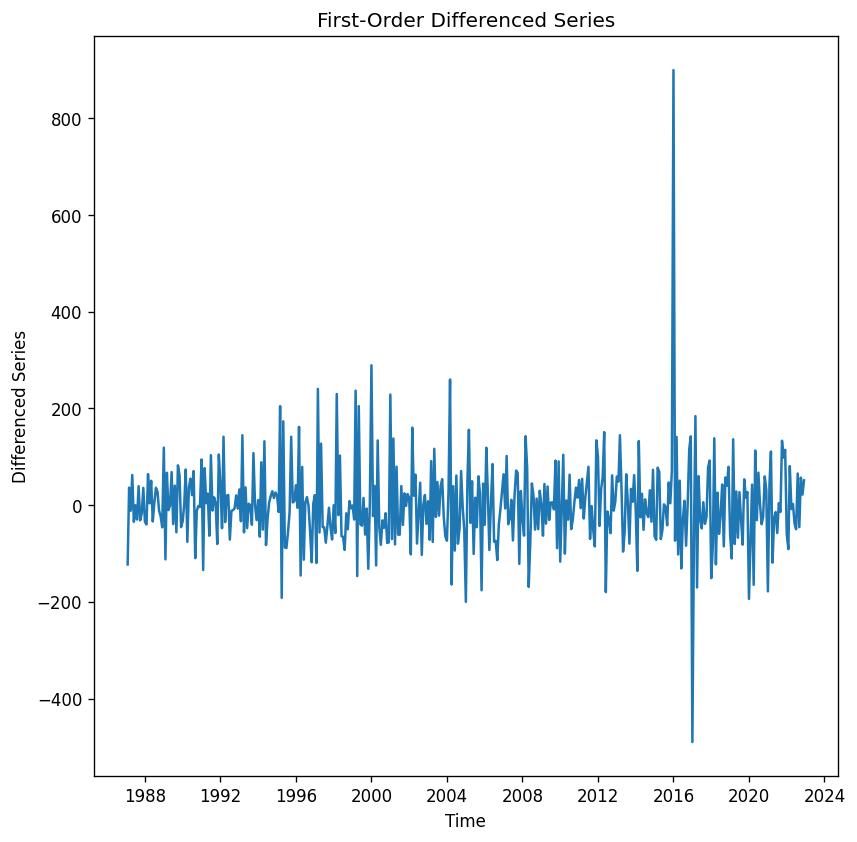

In [213]:
## VISUALIZING THE DIFFERENCED SERIES:

differenced_series = pd.Series(diff_2)  # Replace [...] with your actual differenced series

# Plot the differenced series
plt.figure(figsize=(8,8))
plt.plot(differenced_series)
plt.xlabel('Time')
plt.ylabel('Differenced Series')
plt.title('First-Order Differenced Series')
plt.show()












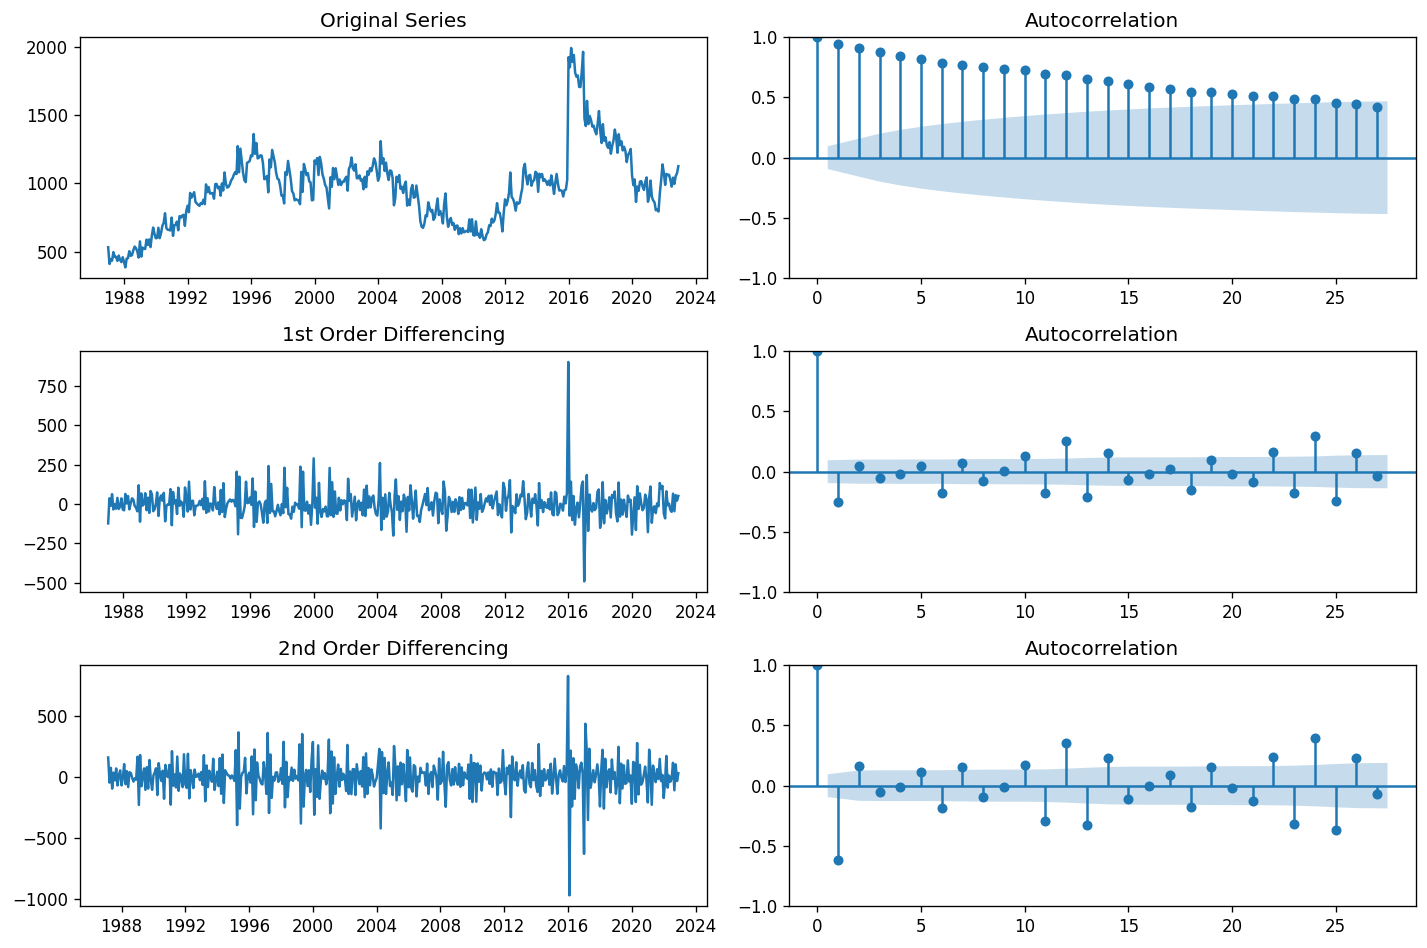

In [214]:
## IMPLEMENTING THE ARIMA MODEL:

## CALCULATING THE TERMS OF ARIMA:

plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(industry_oil_data['emissions_tons']); axes[0, 0].set_title('Original Series')
plot_acf(industry_oil_data['emissions_tons'].values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(industry_oil_data['emissions_tons'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(industry_oil_data['emissions_tons'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(industry_oil_data['emissions_tons'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(industry_oil_data['emissions_tons'].diff().diff().dropna(), ax=axes[2, 1])

plt.tight_layout()
plt.show()











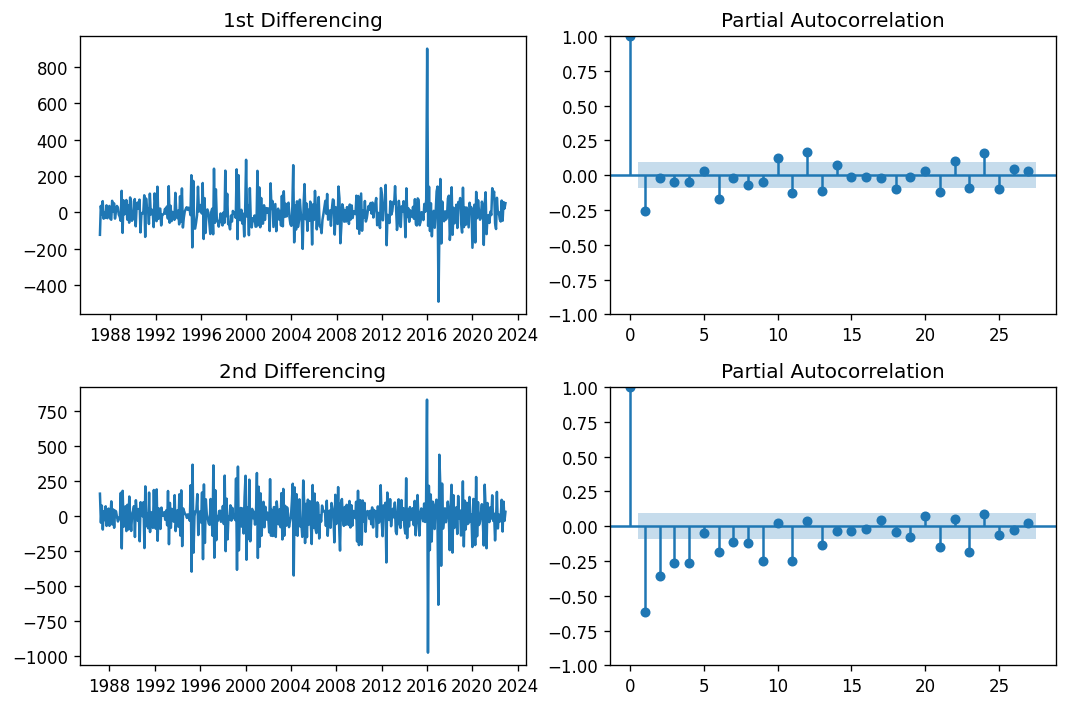

In [215]:
##FOR IMPLEMENTING ARIMA MODEL

plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=False)

# PACF plot of 1st differenced series
axes[0,0].plot(industry_oil_data['emissions_tons'].diff()); axes[0,0].set_title('1st Differencing')
axes[0,1].set(ylim=(0,5))
plot_pacf(industry_oil_data['emissions_tons'].diff().dropna(), ax=axes[0,1])

# PACF plot of 2nd differenced series
axes[1,0].plot(industry_oil_data['emissions_tons'].diff().diff()); axes[1,0].set_title('2nd Differencing')
axes[1,1].set(ylim=(0,5))
plot_pacf(industry_oil_data['emissions_tons'].diff().diff().dropna(), ax=axes[1,1])
plt.tight_layout()
plt.show()

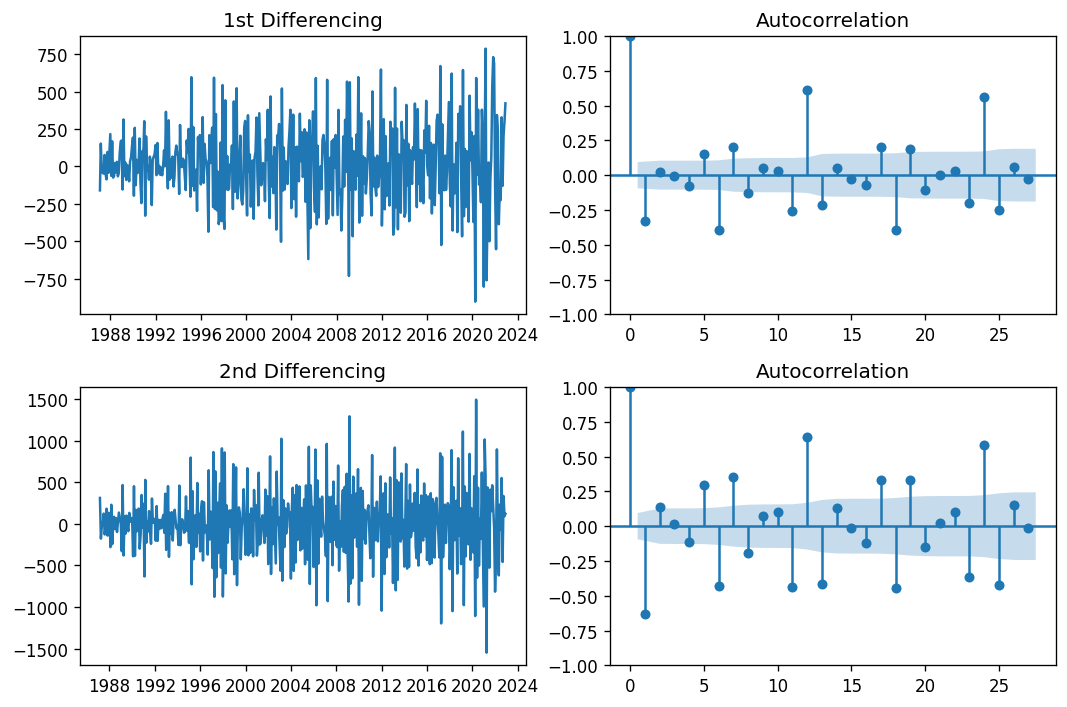

In [216]:
plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=False)

# ACF plot of 1st differenced series
axes[0,0].plot(transport_oil_data['emissions_tons'].diff()); axes[0,0].set_title('1st Differencing')
axes[0,1].set(ylim=(0,5))
plot_acf(transport_oil_data['emissions_tons'].diff().dropna(), ax=axes[0,1])

# ACF plot of 2nd differenced series
axes[1,0].plot(transport_oil_data['emissions_tons'].diff().diff()); axes[1,0].set_title('2nd Differencing')
axes[1,1].set(ylim=(0,5))
plot_acf(transport_oil_data['emissions_tons'].diff().diff().dropna(), ax=axes[1,1])
plt.tight_layout()
plt.show()

In [217]:
!pip install pmdarima

arima_model=auto_arima(industry_oil_data["emissions_tons"],
                       start_p=1,d=1,start_q=1,
                       max_p=4,max_q=4,max_d=4,m=12,
                       start_P=1,D=1,start_Q=1,max_P=4,max_D=4,max_Q=4,
                       seasonal=True,
                       trace=True,
                       error_action="ignore",
                       stepwise=True,
                       n_fits=20)

In [218]:
size=int(len(industry_oil_data['emissions_tons'])*0.66)
X_train,X_test=industry_oil_data['emissions_tons'][0:size],industry_oil_data['emissions_tons'][size:len(industry_oil_data['emissions_tons'])]

In [219]:
X_train.shape


(285,)

In [220]:
X_test.shape


(147,)

In [221]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [222]:
model=SARIMAX(industry_oil_data['emissions_tons'],
             order=(0,1,2),
             seasonal_order=(0,1,2,12))
result=model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     emissions_tons   No. Observations:                  432
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -2447.910
Date:                            Sun, 20 Aug 2023   AIC                           4905.820
Time:                                    20:37:46   BIC                           4926.009
Sample:                                01-01-1987   HQIC                          4913.800
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1225      0.050     -2.427      0.015      -0.221      -0.024
ma.L2         -0.1046      0.047     -2.236      0.025      -0.196      -0.013
ma.S.L12      -0.9816      0.840     -1.169      0.242      -2.628       0.664
ma.S.L24      -0.0163      0.038     -0.429      0.668      -0.091       0.058
sigma2      6294.9729   5293.317      1.189      0.234   -4079.738    1.67e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             26429.27
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               4.05   Skew:                             2.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        41.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [223]:
start_index=0
end_index=len(X_train)-1
train_predction=result.predict(start_index,end_index)
train_predction

1987-01-01      0.000000
1987-02-01    530.902066
1987-03-01    408.472632
1987-04-01    444.927304
1987-05-01    433.259211
                 ...    
2010-05-01    688.890838
2010-06-01    603.881433
2010-07-01    591.040657
2010-08-01    645.927492
2010-09-01    589.180403
Freq: MS, Name: predicted_mean, Length: 285, dtype: float64

In [224]:
st_index=len(X_train)
ed_index=len(transport_oil_data['emissions_tons'])-1
predction=result.predict(st_index,ed_index)
predction

2010-10-01     609.616500
2010-11-01     554.469750
2010-12-01     619.856552
2011-01-01     649.190702
2011-02-01     645.048436
                 ...     
2022-08-01     971.854412
2022-09-01    1007.694720
2022-10-01    1014.998768
2022-11-01    1036.792275
2022-12-01    1092.000614
Freq: MS, Name: predicted_mean, Length: 147, dtype: float64

In [225]:
X_test.index = predction.index

<Axes: >

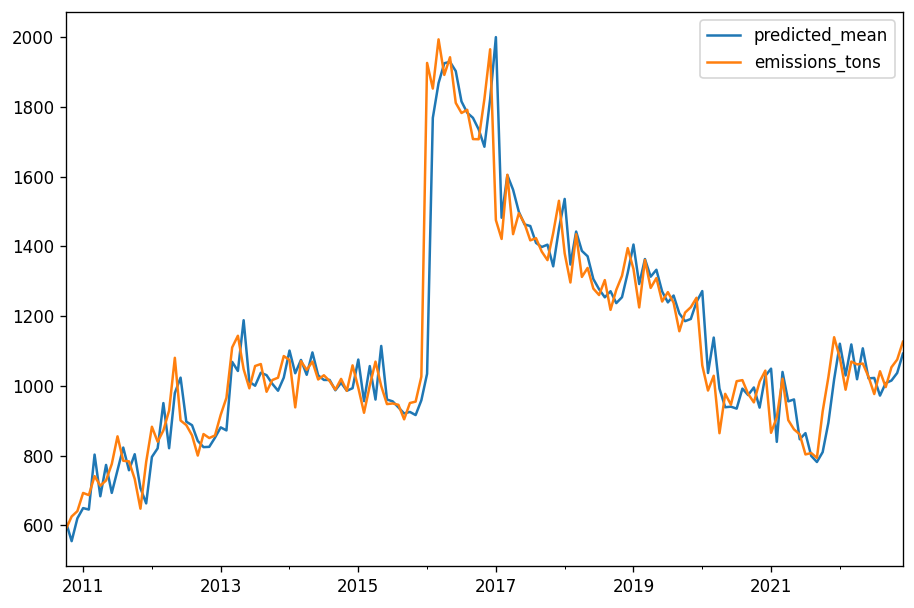

In [226]:
predction.plot(legend=True)
X_test.plot(legend=True)


In [227]:
import math
from sklearn.metrics import mean_squared_error

In [229]:
trainScore=math.sqrt(mean_squared_error(X_train,train_predction))
testScore=math.sqrt(mean_squared_error(X_test,predction))
trainScore,testScore

(72.9203250461452, 87.29290434192453)

In [ ]:
forcast=result.predict(start=len(transport_oil_data['emissions_tons']),
                      end=(len(transport_oil_data['emissions_tons'])-1)+3*12,
                      typ="levels").rename('Forecust')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
print(forcast)

2023-01-01    1127.956597
2023-02-01    1078.363550
2023-03-01    1197.281617
2023-04-01    1139.590394
2023-05-01    1185.051907
2023-06-01    1141.435186
2023-07-01    1133.021801
2023-08-01    1126.490532
2023-09-01    1095.268861
2023-10-01    1119.509408
2023-11-01    1106.313557
2023-12-01    1131.584346
2024-01-01    1142.149358
2024-02-01    1096.758590
2024-03-01    1216.310120
2024-04-01    1157.778857
2024-05-01    1203.935421
2024-06-01    1160.230384
2024-07-01    1152.487209
2024-08-01    1144.764652
2024-09-01    1113.783568
2024-10-01    1137.511541
2024-11-01    1123.763142
2024-12-01    1148.626473
2025-01-01    1159.321844
2025-02-01    1113.988093
2025-03-01    1233.539623
2025-04-01    1175.008360
2025-05-01    1221.164924
2025-06-01    1177.459887
2025-07-01    1169.716712
2025-08-01    1161.994155
2025-09-01    1131.013071
2025-10-01    1154.741044
2025-11-01    1140.992645
2025-12-01    1165.855976
Freq: MS, Name: Forecust, dtype: float64


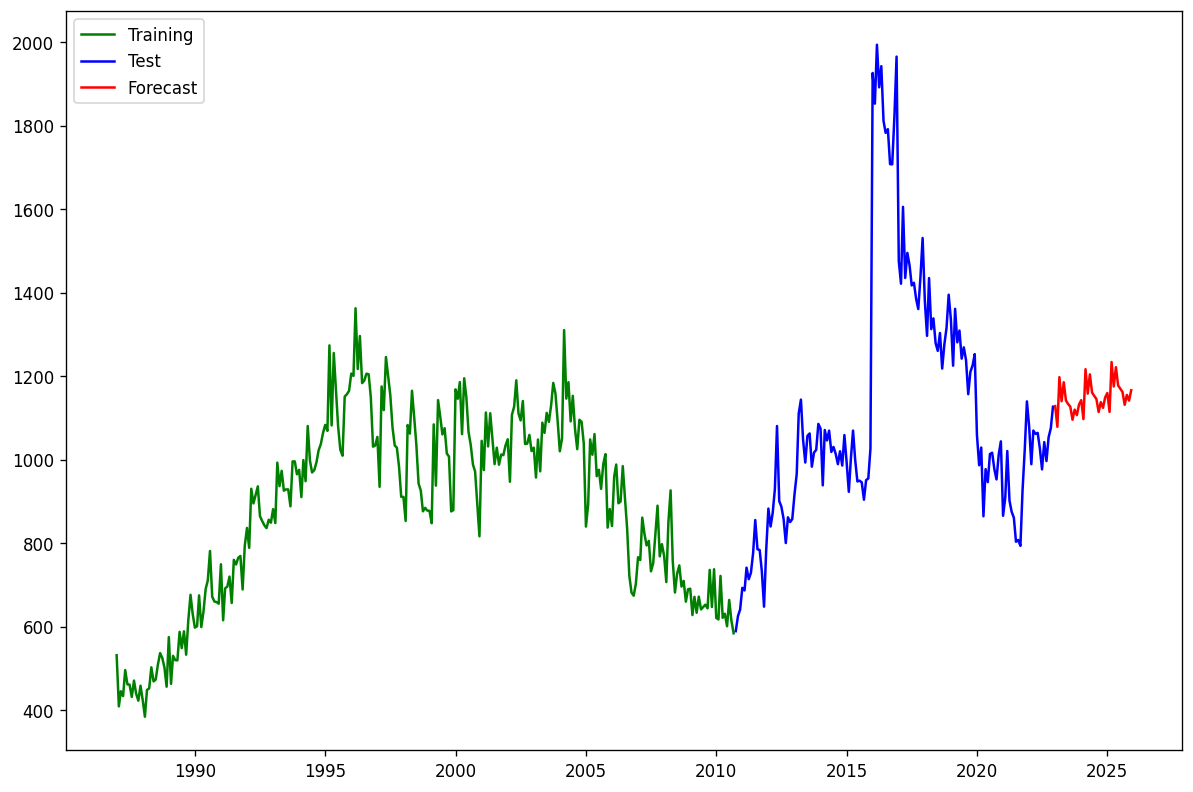

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(X_train,label="Training",color='green')
plt.plot(X_test,label="Test",color='blue')
plt.plot(forcast,label="Forecast",color="red")
plt.legend(loc="upper left")

## OTHER - CATEGORY
### SOURCE (OIL)



In [230]:
other_oil_data = other_data.loc[other_data['fuel_type'] == 'oil']
other_oil_data = other_oil_data.drop(['source','fuel_type'],axis=1)

In [231]:
print(other_oil_data)

      year  month  emissions_tons
864   1987      1          587.72
865   1987      2          535.58
866   1987      3          584.31
867   1987      4          565.79
868   1987      5          563.24
...    ...    ...             ...
1291  2022      8         1134.95
1292  2022      9         1070.10
1293  2022     10         1138.38
1294  2022     11         1161.45
1295  2022     12         1222.93

[432 rows x 3 columns]


In [232]:
other_oil_data['date'] = date_month
other_oil_data["date"]=pd.to_datetime(other_oil_data["date"])
other_oil_data.set_index("date",inplace=True)
other_oil_data

year  month  emissions_tons
date                                   
1987-01-01  1987      1          587.72
1987-02-01  1987      2          535.58
1987-03-01  1987      3          584.31
1987-04-01  1987      4          565.79
1987-05-01  1987      5          563.24
...          ...    ...             ...
2022-08-01  2022      8         1134.95
2022-09-01  2022      9         1070.10
2022-10-01  2022     10         1138.38
2022-11-01  2022     11         1161.45
2022-12-01  2022     12         1222.93

[432 rows x 3 columns]

In [ ]:
#other_oil_data = other_oil_data.drop(['year','month'],axis=1)

In [233]:
other_oil_data.head(5)

year  month  emissions_tons
date                                   
1987-01-01  1987      1          587.72
1987-02-01  1987      2          535.58
1987-03-01  1987      3          584.31
1987-04-01  1987      4          565.79
1987-05-01  1987      5          563.24

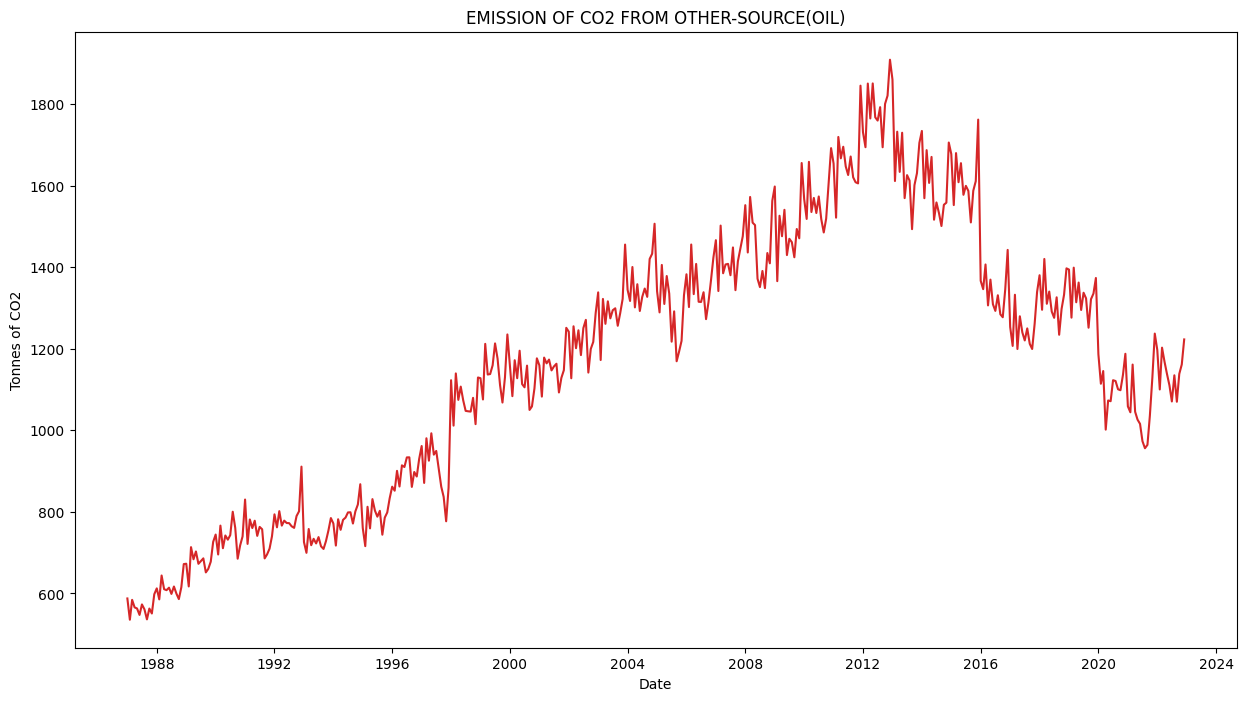

In [234]:
### Visualizing the series:


def plot_df(df, x, y, title="", xlabel='Date', ylabel='Tonnes of CO2', dpi=100):
    plt.figure(figsize=(15,8), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(other_oil_data, x=other_oil_data.index, y=other_oil_data['emissions_tons'], title='EMISSION OF CO2 FROM OTHER-SOURCE(OIL)')





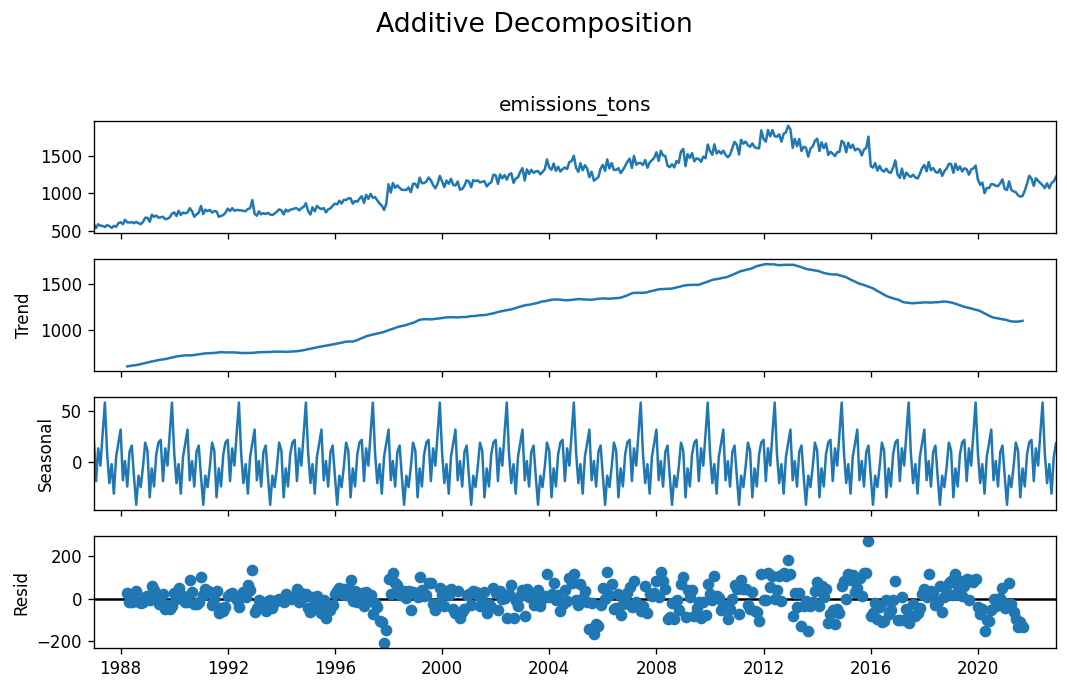

In [235]:
## DECOMPOSITION OF TIME SERIES:
## CHECKING HOW THE TIME SERIES IS MADE OF

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


## ADDITIVE

additive_decomposition = seasonal_decompose(other_oil_data['emissions_tons'], model='additive', period=30)

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


## MULTIPL

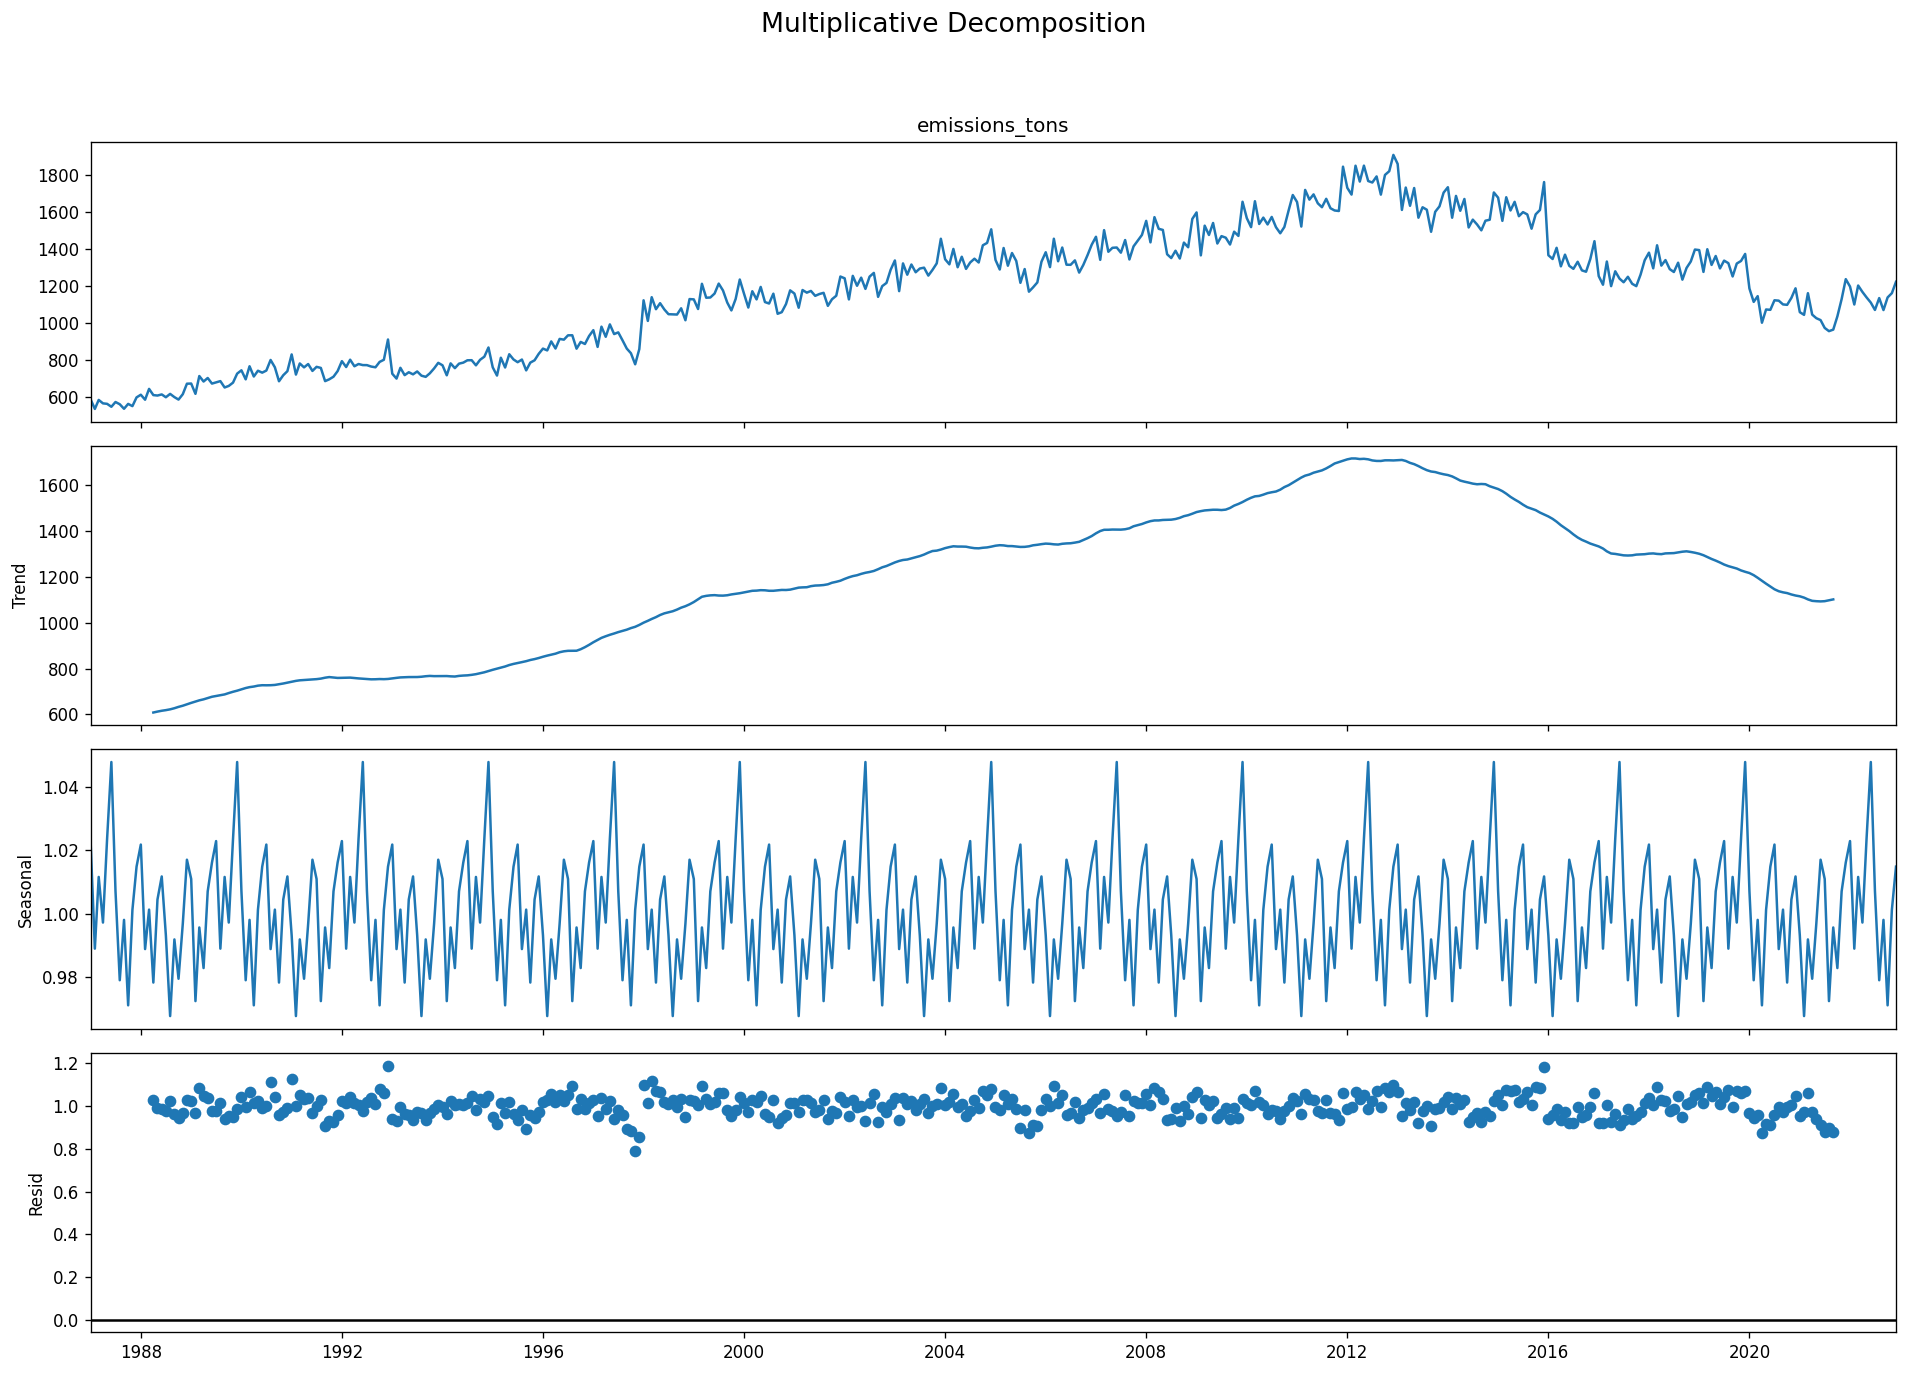

In [236]:
## MULTIPLICATIVE MODEL:



multiplicative_decomposition = seasonal_decompose(other_oil_data['emissions_tons'], model='multiplicative', period=30)

plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [237]:
from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is stored in a pandas Series called 'series'
result = adfuller(other_oil_data['emissions_tons'])

# Extract and print the p-value
p_value = result[1]
print("ADF p-value:", p_value)

if  (p_value) > 0.05:
  print("SERIES IS NOT STATIONARY")
else:
  print("SERIES IS STATIONARY")

ADF p-value: 0.36481276971363485
SERIES IS NOT STATIONARY


In [238]:
## STEPS FOR CONVERTING THE NON STATIONARY TO STATIONARY:


## TAKING THE DIFFERENCING THE SERIES:


other_oil_data['Differenced'] = other_oil_data['emissions_tons'].diff().dropna()



In [239]:
other_oil_data['Differenced']=other_oil_data['Differenced'].dropna()

In [240]:
diff_3 = other_oil_data['Differenced'].dropna()

In [241]:
## AFTER DIFFERENCING :
## CHECKING FOR STATIONARY:

from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is stored in a pandas Series called 'series'
result = adfuller(diff_3)

# Extract and print the p-value
p_value = result[1]
print("ADF p-value:", p_value)

if  (p_value) > 0.05:
  print("SERIES IS NOT STATIONARY")
else:
  print("SERIES IS STATIONARY")



ADF p-value: 1.304712774911031e-05
SERIES IS STATIONARY


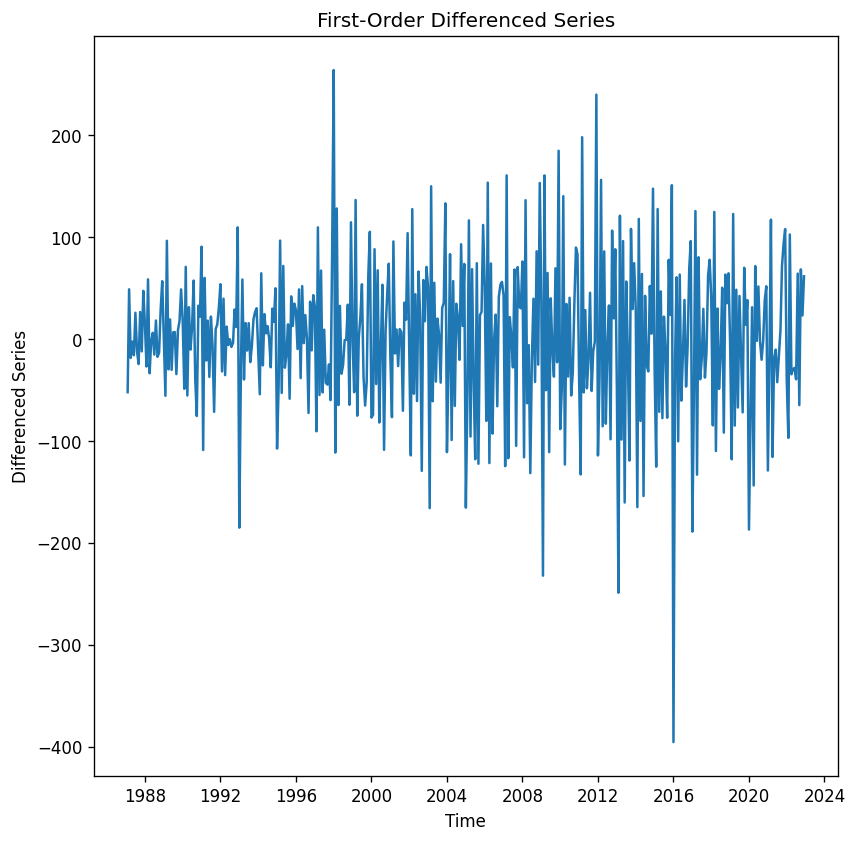

In [242]:
## VISUALIZING THE DIFFERENCED SERIES:

differenced_series = pd.Series(diff_3)  # Replace [...] with your actual differenced series

# Plot the differenced series
plt.figure(figsize=(8,8))
plt.plot(differenced_series)
plt.xlabel('Time')
plt.ylabel('Differenced Series')
plt.title('First-Order Differenced Series')
plt.show()












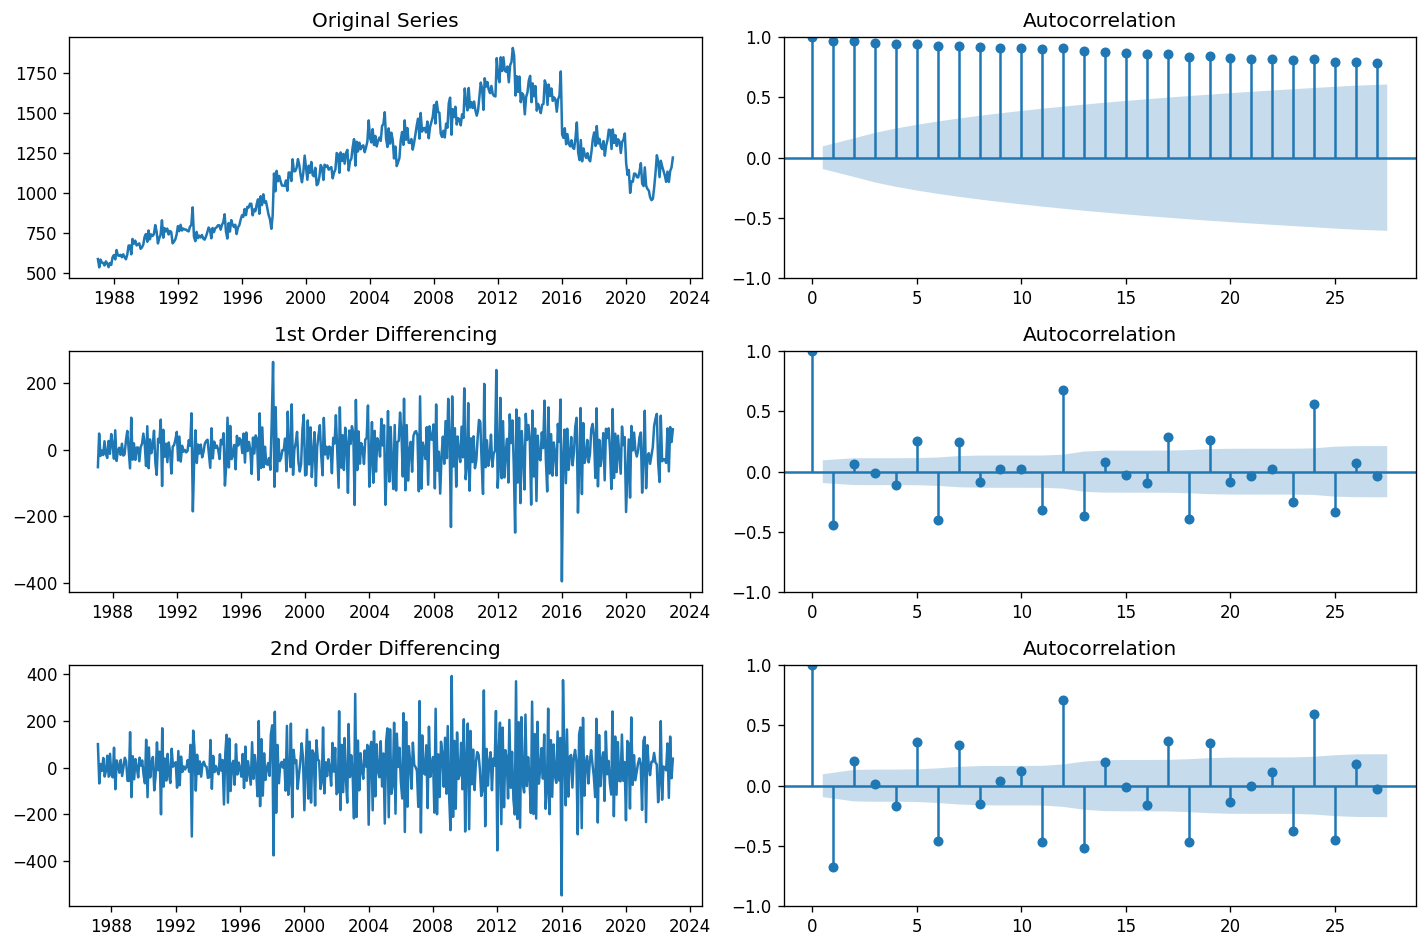

In [ ]:
## IMPLEMENTING THE ARIMA MODEL:

## CALCULATING THE TERMS OF ARIMA:

plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(other_oil_data['emissions_tons']); axes[0, 0].set_title('Original Series')
plot_acf(other_oil_data['emissions_tons'].values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(other_oil_data['emissions_tons'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(other_oil_data['emissions_tons'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(other_oil_data['emissions_tons'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(other_oil_data['emissions_tons'].diff().diff().dropna(), ax=axes[2, 1])

plt.tight_layout()
plt.show()











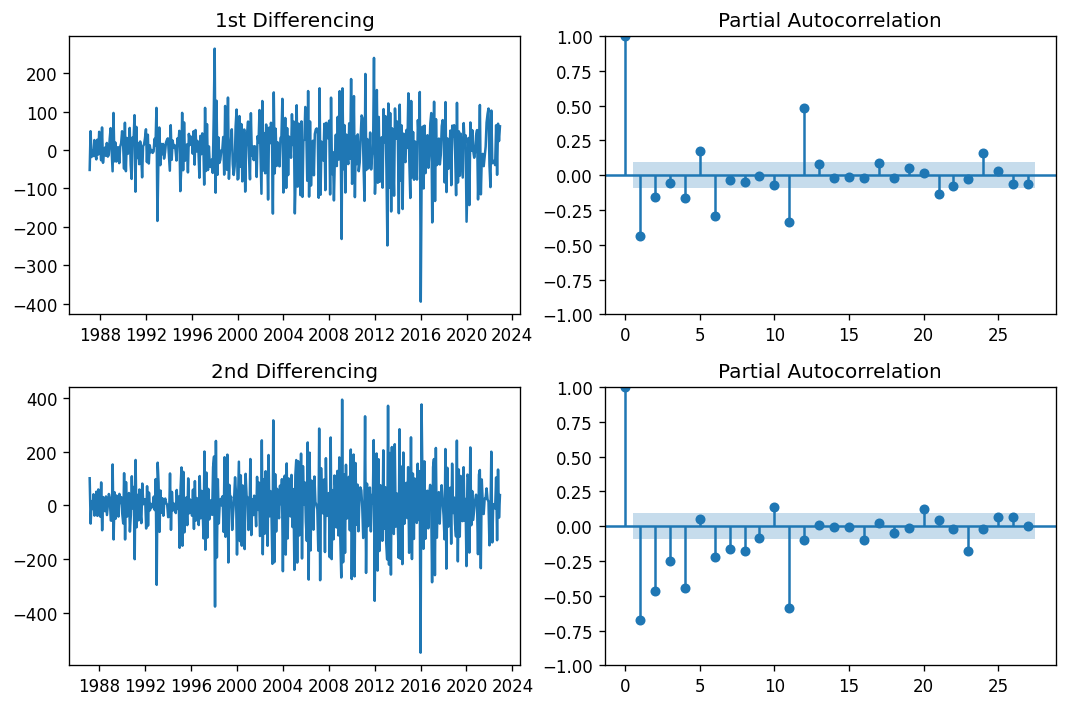

In [ ]:
##FOR IMPLEMENTING ARIMA MODEL

plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=False)

# PACF plot of 1st differenced series
axes[0,0].plot(other_oil_data['emissions_tons'].diff()); axes[0,0].set_title('1st Differencing')
axes[0,1].set(ylim=(0,5))
plot_pacf(other_oil_data['emissions_tons'].diff().dropna(), ax=axes[0,1])

# PACF plot of 2nd differenced series
axes[1,0].plot(other_oil_data['emissions_tons'].diff().diff()); axes[1,0].set_title('2nd Differencing')
axes[1,1].set(ylim=(0,5))
plot_pacf(other_oil_data['emissions_tons'].diff().diff().dropna(), ax=axes[1,1])
plt.tight_layout()
plt.show()

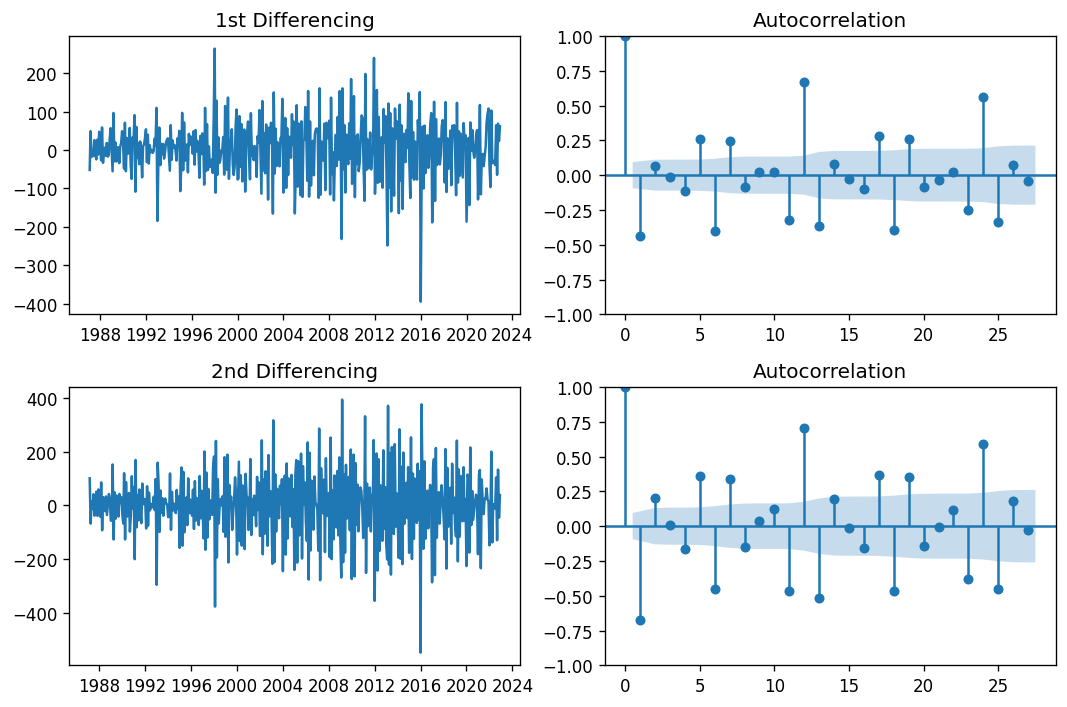

In [ ]:
plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=False)

# ACF plot of 1st differenced series
axes[0,0].plot(other_oil_data['emissions_tons'].diff()); axes[0,0].set_title('1st Differencing')
axes[0,1].set(ylim=(0,5))
plot_acf(other_oil_data['emissions_tons'].diff().dropna(), ax=axes[0,1])

# ACF plot of 2nd differenced series
axes[1,0].plot(other_oil_data['emissions_tons'].diff().diff()); axes[1,0].set_title('2nd Differencing')
axes[1,1].set(ylim=(0,5))
plot_acf(other_oil_data['emissions_tons'].diff().diff().dropna(), ax=axes[1,1])
plt.tight_layout()
plt.show()

In [243]:
# #!pip install pmdarima

# arima_model=auto_arima(other_oil_data["emissions_tons"],
#                        start_p=1,d=1,start_q=1,
#                        max_p=4,max_q=4,max_d=4,m=12,
#                        start_P=1,D=1,start_Q=1,max_P=4,max_D=4,max_Q=4,
#                        seasonal=True,
#                        trace=True,
#                        error_action="ignore",
#                        stepwise=True,
#                        n_fits=20)

In [244]:
size=int(len(other_oil_data['emissions_tons'])*0.66)
X_train,X_test=other_oil_data['emissions_tons'][0:size],other_oil_data['emissions_tons'][size:len(other_oil_data['emissions_tons'])]

In [245]:
X_train.shape


(285,)

In [246]:
X_test.shape


(147,)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [247]:
model=SARIMAX(other_oil_data['emissions_tons'],
             order=(0,1,1),
             seasonal_order=(0,1,1,12))
result=model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     emissions_tons   No. Observations:                  432
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2212.953
Date:                            Sun, 20 Aug 2023   AIC                           4431.906
Time:                                    20:40:30   BIC                           4444.020
Sample:                                01-01-1987   HQIC                          4436.695
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3389      0.047     -7.231      0.000      -0.431      -0.247
ma.S.L12      -0.8264      0.023    -35.721      0.000      -0.872      -0.781
sigma2      2190.8268     62.555     35.022      0.000    2068.220    2313.433
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              2275.98
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.84   Skew:                            -1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [248]:
start_index=0
end_index=len(X_train)-1
train_predction=result.predict(start_index,end_index)
train_predction

1987-01-01       0.000000
1987-02-01     587.353588
1987-03-01     535.644424
1987-04-01     584.249443
1987-05-01     565.812970
                 ...     
2010-05-01    1591.193046
2010-06-01    1511.301789
2010-07-01    1525.018224
2010-08-01    1580.694306
2010-09-01    1476.454207
Freq: MS, Name: predicted_mean, Length: 285, dtype: float64

In [249]:
st_index=len(X_train)
ed_index=len(transport_oil_data['emissions_tons'])-1
predction=result.predict(st_index,ed_index)
predction

2010-10-01    1533.783870
2010-11-01    1533.592227
2010-12-01    1687.838760
2011-01-01    1683.837781
2011-02-01    1561.517605
                 ...     
2022-08-01    1091.630991
2022-09-01    1073.414936
2022-10-01    1115.987960
2022-11-01    1173.257343
2022-12-01    1254.316144
Freq: MS, Name: predicted_mean, Length: 147, dtype: float64

In [250]:
X_test.index = predction.index

<Axes: >

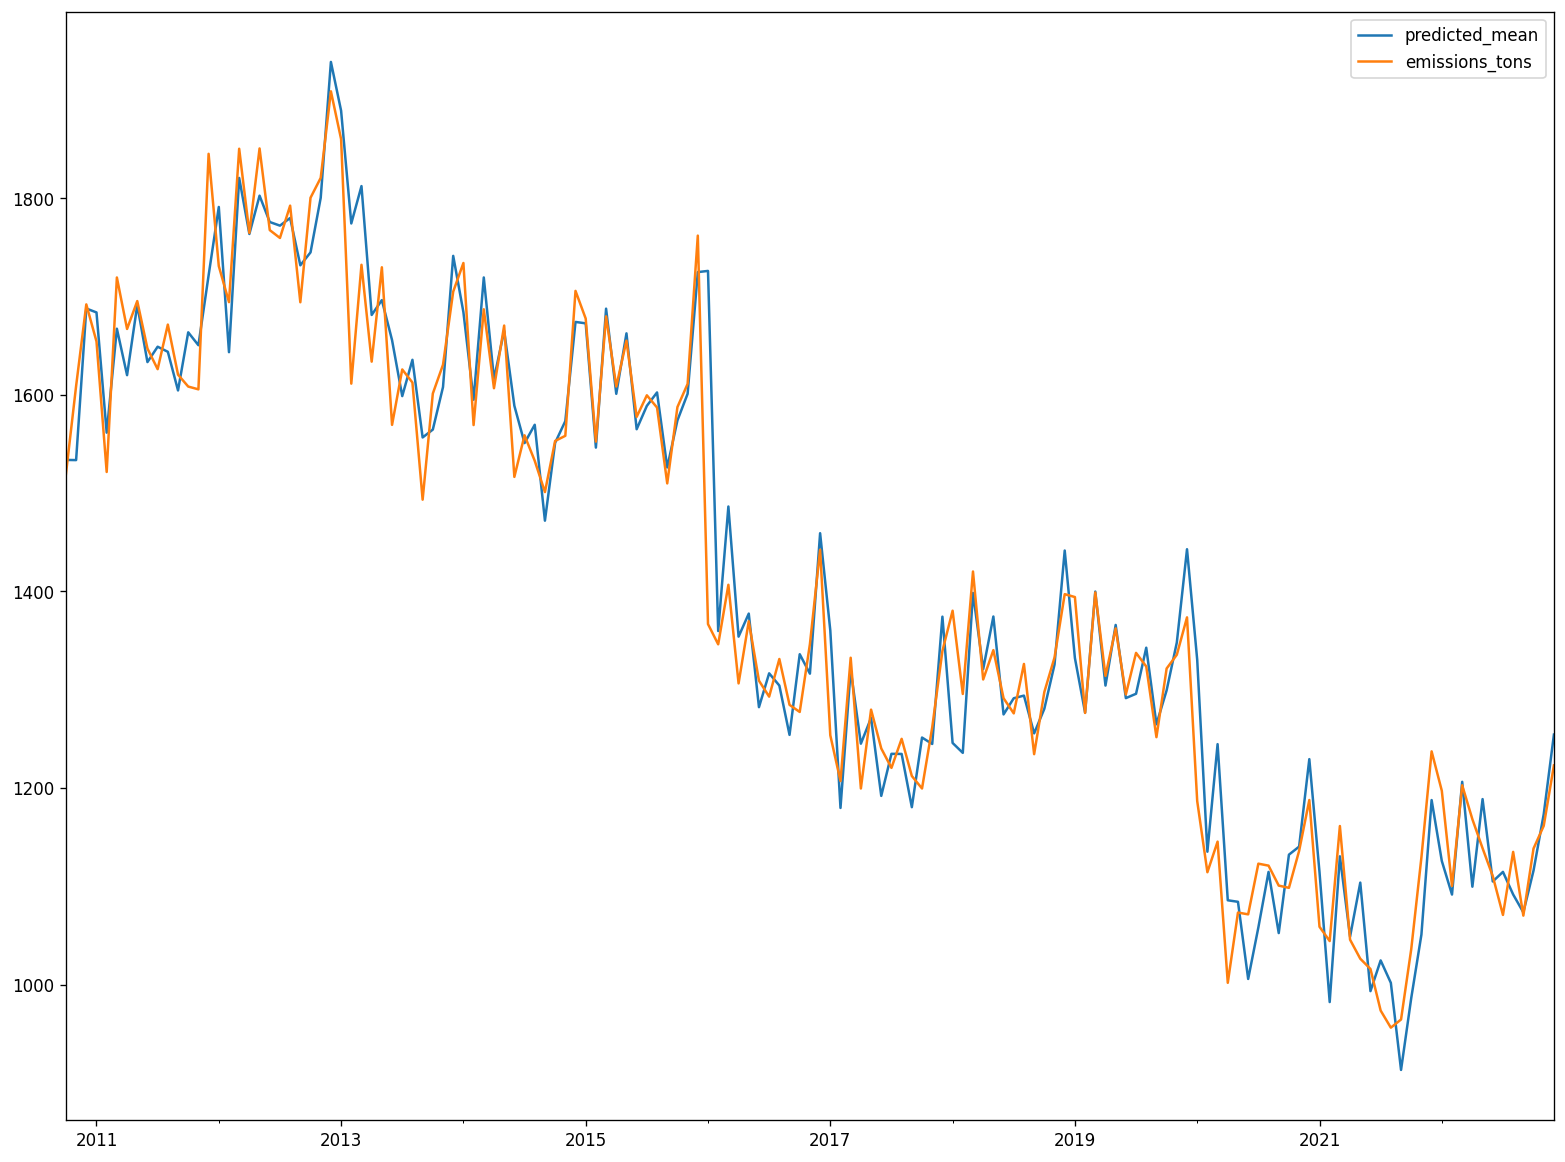

In [251]:
predction.plot(legend=True)
X_test.plot(legend=True)


In [252]:
import math
from sklearn.metrics import mean_squared_error

In [253]:
trainScore=math.sqrt(mean_squared_error(X_train,train_predction))
testScore=math.sqrt(mean_squared_error(X_test,predction))
trainScore,testScore

(57.17023855053825, 54.07297541705064)

In [254]:
forcast=result.predict(start=len(transport_oil_data['emissions_tons']),
                      end=(len(transport_oil_data['emissions_tons'])-1)+3*12,
                      typ="levels").rename('Forecust')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [255]:
print(forcast)

2023-01-01    1148.338956
2023-02-01    1064.256879
2023-03-01    1172.088272
2023-04-01    1079.808343
2023-05-01    1110.848036
2023-06-01    1063.993979
2023-07-01    1062.216192
2023-08-01    1078.289140
2023-09-01    1028.310095
2023-10-01    1077.156888
2023-11-01    1116.255404
2023-12-01    1200.366379
2024-01-01    1116.985651
2024-02-01    1032.903575
2024-03-01    1140.734968
2024-04-01    1048.455039
2024-05-01    1079.494731
2024-06-01    1032.640675
2024-07-01    1030.862888
2024-08-01    1046.935836
2024-09-01     996.956791
2024-10-01    1045.803584
2024-11-01    1084.902100
2024-12-01    1169.013075
2025-01-01    1085.632347
2025-02-01    1001.550271
2025-03-01    1109.381663
2025-04-01    1017.101734
2025-05-01    1048.141427
2025-06-01    1001.287371
2025-07-01     999.509584
2025-08-01    1015.582532
2025-09-01     965.603487
2025-10-01    1014.450279
2025-11-01    1053.548795
2025-12-01    1137.659770
Freq: MS, Name: Forecust, dtype: float64


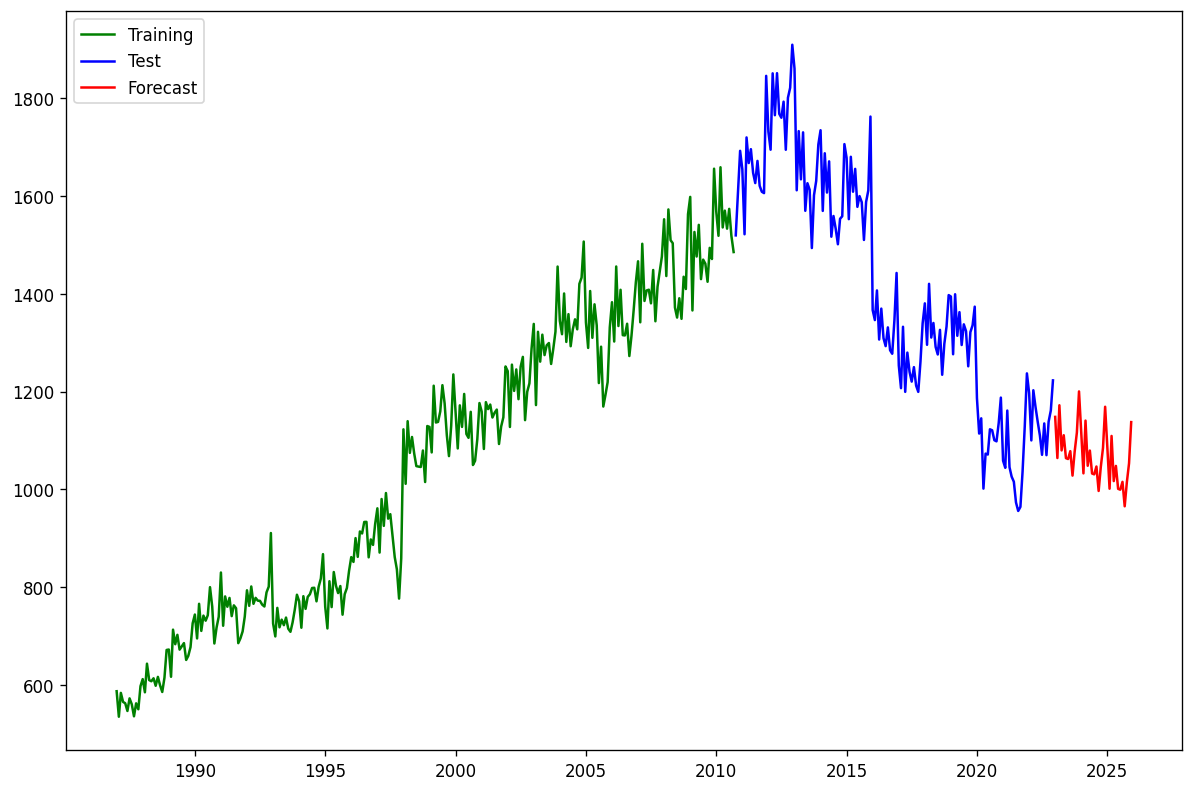

In [256]:
plt.figure(figsize=(12,8))
plt.plot(X_train,label="Training",color='green')
plt.plot(X_test,label="Test",color='blue')
plt.plot(forcast,label="Forecast",color="red")
plt.legend(loc="upper left")